# **Menganalisis dan Memodelkan Data Untuk Memprediksi Spesies Bunga Iris**

#**Import Library**

In [502]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from google.colab import drive
from sklearn.model_selection import train_test_split #library untuk splitting data
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler # library untuk normalisasi data

#library untuk build model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay,f1_score, precision_score, recall_score, roc_auc_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Scatter plot untuk hasil clustering Hierarchical
from scipy.cluster.hierarchy import linkage

from sklearn.model_selection import GridSearchCV

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan utama dari dataset ini adalah untuk mengembangkan model prediktif yang dapat memprediksi spesies bunga iris berdasarkan fitur-fitur morfologisnya. Hal ini dapat bermanfaat bagi para peneliti, petani, atau pecinta tumbuhan untuk mengidentifikasi spesies bunga iris dengan lebih cepat dan akurat

##**Assess Situation**

Situasi bisnis yang mendasari analisa ini adalah industri pertanian botani yang saat ini proses identifikasi dilakukan secara manual oleh ahli botani, yang memerlukan waktu dan tenaga yang cukup besar

##**Data Mining Goals**

Tujuan data mining pada dataset ini adalah mengekstraksi informasi yang berharga dan wawasan yang mendalam tentang hubungan antara fitur-fitur morfologis bunga iris dan spesiesnya

##**Project Plan**

Pada tahap awal, pemahaman data dilakukan dengan mempelajari struktur dataset iris, yang mencakup fitur-fitur seperti sepallength, sepalwidth, petallength, dan petalwidth. Setelah itu, dilanjutkan dengan eksplorasi data untuk mendapatkan pemahaman yang lebih dalam tentang fitur-fitur tersebut melalui visualisasi data. Selanjutnya, tahap pra-pemrosesan data dilakukan dengan memeriksa dan menangani missing value, serta melakukan pemrosesan data lainnya untuk mempersiapkan dataset. Pembagian data dilakukan dengan membagi dataset menjadi set pelatihan dan pengujian untuk melatih dan menguji model machine learning yang dipilih. Setelah model dipilih, dilakukan pelatihan menggunakan set pelatihan dan evaluasi kinerjanya, termasuk menggunakan teknik validasi silang jika diperlukan. Evaluasi model melibatkan perbandingan performa model yang berbeda jika digunakan lebih dari satu model, dengan opsi untuk menyetel parameter untuk meningkatkan kinerja model. Setelah model ditentukan, tahap prediksi dilakukan menggunakan model yang telah ditraining untuk membuat prediksi spesies iris berdasarkan fitur-fitur morfologisnya pada data baru atau data pengujian. Akhirnya, interpretasi hasil dilakukan untuk mengevaluasi efektivitas model dalam memprediksi spesies iris dari fitur-fitur yang diberikan.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Jelaskan darimana sumber data kalian di sini, sertakan linknya juga ya

In [503]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Colab Notebooks/iris_csv.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Describe Data**

Dataset ini terdiri dari 150 sampel bunga iris yang masing-masing memiliki empat fitur: panjang sepal, lebar sepal, panjang petal, dan lebar petal. Setiap sampel bunga iris juga diberi label kelas yang menunjukkan spesies bunga iris tersebut. Deskripsi kolom-kolom dalam dataset iris adalah sebagai berikut:

1. SepalLength: Ini adalah panjang sepal (dalam cm) dari bunga iris.
2. SepalWidth: Ini adalah lebar sepal (dalam cm) dari bunga iris.
3. PetalLength: Ini adalah panjang petal (dalam cm) dari bunga iris.
4. PetalWidth: Ini adalah lebar petal (dalam cm) dari bunga iris.
5. Class: Ini adalah label kelas yang menunjukkan spesies bunga iris. Ada tiga kelas dalam dataset iris: Setosa, Versicolor, dan Virginica.

Dengan menggunakan dataset iris, Kita dapat melakukan berbagai tugas pemodelan data seperti klasifikasi, klastering, dan regresi, serta mempelajari berbagai teknik pemrosesan data dan visualisasi data.

####Informasi Dasar

In [504]:
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

Jumlah baris: 150
Jumlah kolom: 5


Pada dataset iris memiliki panjang kolom sebanyak 5 dan panjang baris sebanyak 150 baris

####Informasi Lanjutan

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


1. Kolom pertama bernama sepallenght (panjang sepal) dengan tipe data float dan tidak ada data yang kosong
1. Kolom pertama bernama sepalwidht (lebar sepal) dengan tipe data float dan tidak ada data yang kosong
1. Kolom pertama bernama petallenght (panjang petal) dengan tipe data float dan tidak ada data yang kosong
1. Kolom pertama bernama petalwidht (lebar petal) dengan tipe data float dan tidak ada data yang kosong
1. Kolom pertama bernama class (label kelas yang menunjukkan spesies bunga iris. Ada tiga kelas dalam dataset iris: Setosa, Versicolor, dan Virginica.) dengan tipe data object (string) dan tidak ada data yang kosong

####Informasi Statistik Deskriptif

In [506]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sepallenght (panjang sepal)
- count = untuk kolom sepallenght memiliki **150** data yang terisi dari 150 baris data
- mean = rata rata dari kolom sepallenght adalah **5.84**
- std = standar deviasi atau persebaran data terhadap rata rata adalah **0.83**
- min = nilai terkecil dari kolom tersebut adalah **4.3**
- 25% = nilai yang membagi 25% data terendah adalah **5,1**
- 50% = nilai yang membagi 50% data terendah adalah **5,8**
- 75% = nilai yang membagi 75% data terendah adalah **6,4**
- max = nilai terbesar dari kolom tersebut adalah **7,9**

Sepalwidht (lebar sepal)
- count = untuk kolom sepalwidht memiliki **150** data yang terisi dari 150 baris data
- mean = rata rata dari kolom sepalwidht adalah **3,05**
- std = standar deviasi atau persebaran data terhadap rata rata adalah **0.43**
- min = nilai terkecil dari kolom tersebut adalah **2,0**
- 25% = nilai yang membagi 25% data terendah adalah **2,8**
- 50% = nilai yang membagi 50% data terendah adalah **3,0**
- 75% = nilai yang membagi 75% data terendah adalah **3,3**
- max = nilai terbesar dari kolom tersebut adalah **4,4**

Petallenght (panjang petal)
- count = untuk kolom petallenght memiliki **150** data yang terisi dari 150 baris data
- mean = rata rata dari kolom petallenght adalah **3,76**
- std = standar deviasi atau persebaran data terhadap rata rata adalah **1,76**
- min = nilai terkecil dari kolom tersebut adalah **1,0**
- 25% = nilai yang membagi 25% data terendah adalah **1,6**
- 50% = nilai yang membagi 50% data terendah adalah **4,35**
- 75% = nilai yang membagi 75% data terendah adalah **5,1**
- max = nilai terbesar dari kolom tersebut adalah **6,9**

Petalwidht (lebar petal)
- count = untuk kolom petalwidht memiliki **150** data yang terisi dari 150 baris data
- mean = rata rata dari kolom petalwidht adalah **1,20**
- std = standar deviasi atau persebaran data terhadap rata rata adalah **0,76**
- min = nilai terkecil dari kolom tersebut adalah **0,1**
- 25% = nilai yang membagi 25% data terendah adalah **0,3**
- 50% = nilai yang membagi 50% data terendah adalah **1,3**
- 75% = nilai yang membagi 75% data terendah adalah **1,8**
- max = nilai terbesar dari kolom tersebut adalah **2,5**



##**Exploratory Data Analysis**

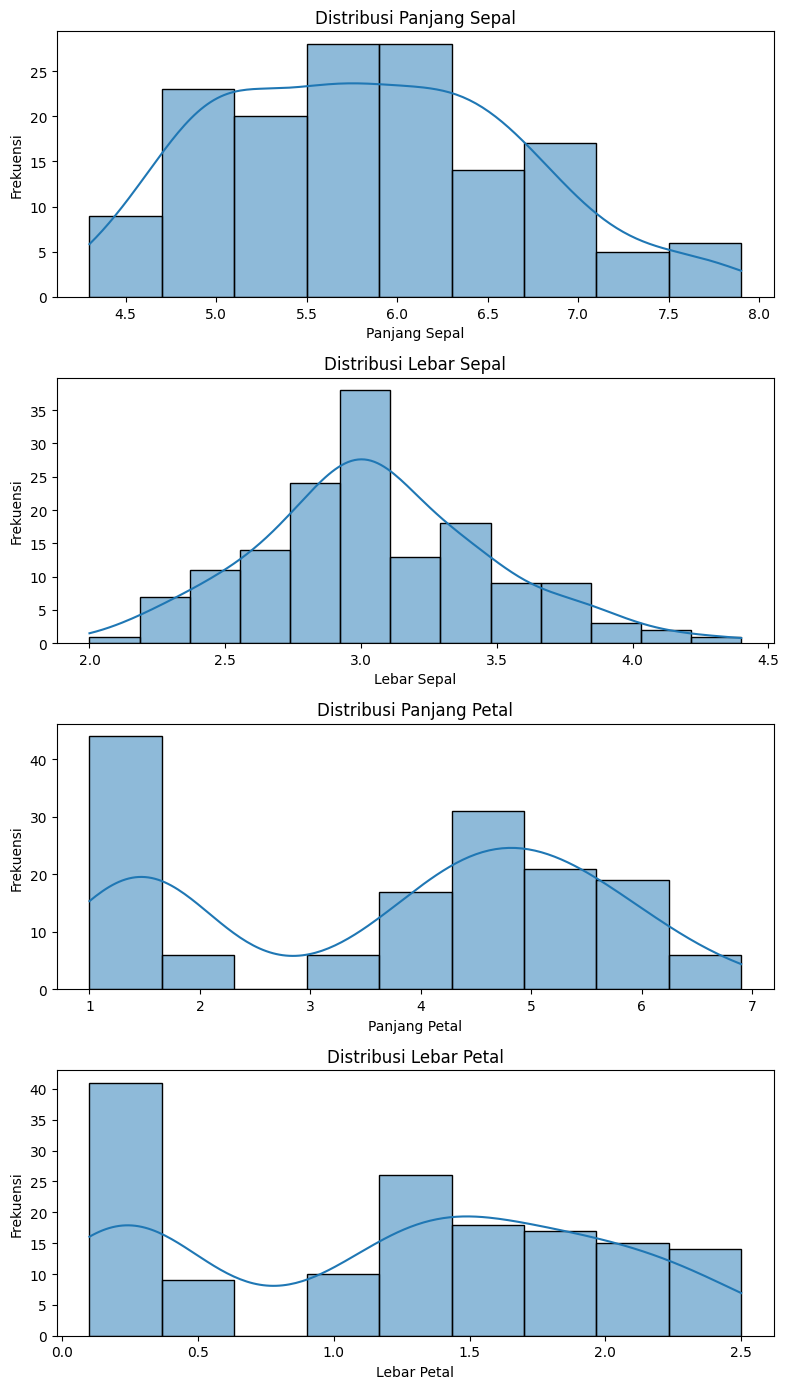

In [507]:
fig, axes = plt.subplots(4, 1, figsize=(8, 14))
sns.histplot(df['sepallength'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Panjang Sepal')
axes[0].set_xlabel('Panjang Sepal')
axes[0].set_ylabel('Frekuensi')

sns.histplot(df['sepalwidth'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Lebar Sepal')
axes[1].set_xlabel('Lebar Sepal')
axes[1].set_ylabel('Frekuensi')

sns.histplot(df['petallength'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Panjang Petal')
axes[2].set_xlabel('Panjang Petal')
axes[2].set_ylabel('Frekuensi')

sns.histplot(df['petalwidth'], kde=True, ax=axes[3])
axes[3].set_title('Distribusi Lebar Petal')
axes[3].set_xlabel('Lebar Petal')
axes[3].set_ylabel('Frekuensi')

plt.tight_layout()  # Untuk mengatur layout plot
plt.show()

- Dari plot pertama, distribusi panjang sepal terlihat cukup bervariasi, dengan beberapa puncak frekuensi yang mungkin menunjukkan keberadaan beberapa kelompok yang berbeda dalam dataset.
- Plot kedua menunjukkan distribusi lebar sepal, yang juga memiliki variasi tetapi tampaknya kurang bervariasi dibandingkan dengan panjang sepal.
- Plot ketiga menunjukkan distribusi panjang petal, yang tampaknya lebih konsisten dibandingkan dengan panjang sepal, dengan puncak frekuensi yang lebih terfokus.
- Plot keempat menunjukkan distribusi lebar petal, yang tampaknya memiliki distribusi yang paling terkonsentrasi, dengan sedikit variasi dibandingkan dengan panjang petal.
>Dari distribusi ini, kita bisa mendapatkan pemahaman yang lebih baik tentang bagaimana panjang dan lebar sepal serta panjang dan lebar petal berdistribusi dalam dataset. Hal ini dapat membantu dalam analisis lebih lanjut, seperti dalam klasifikasi atau klastering data.

<Figure size 1000x600 with 0 Axes>

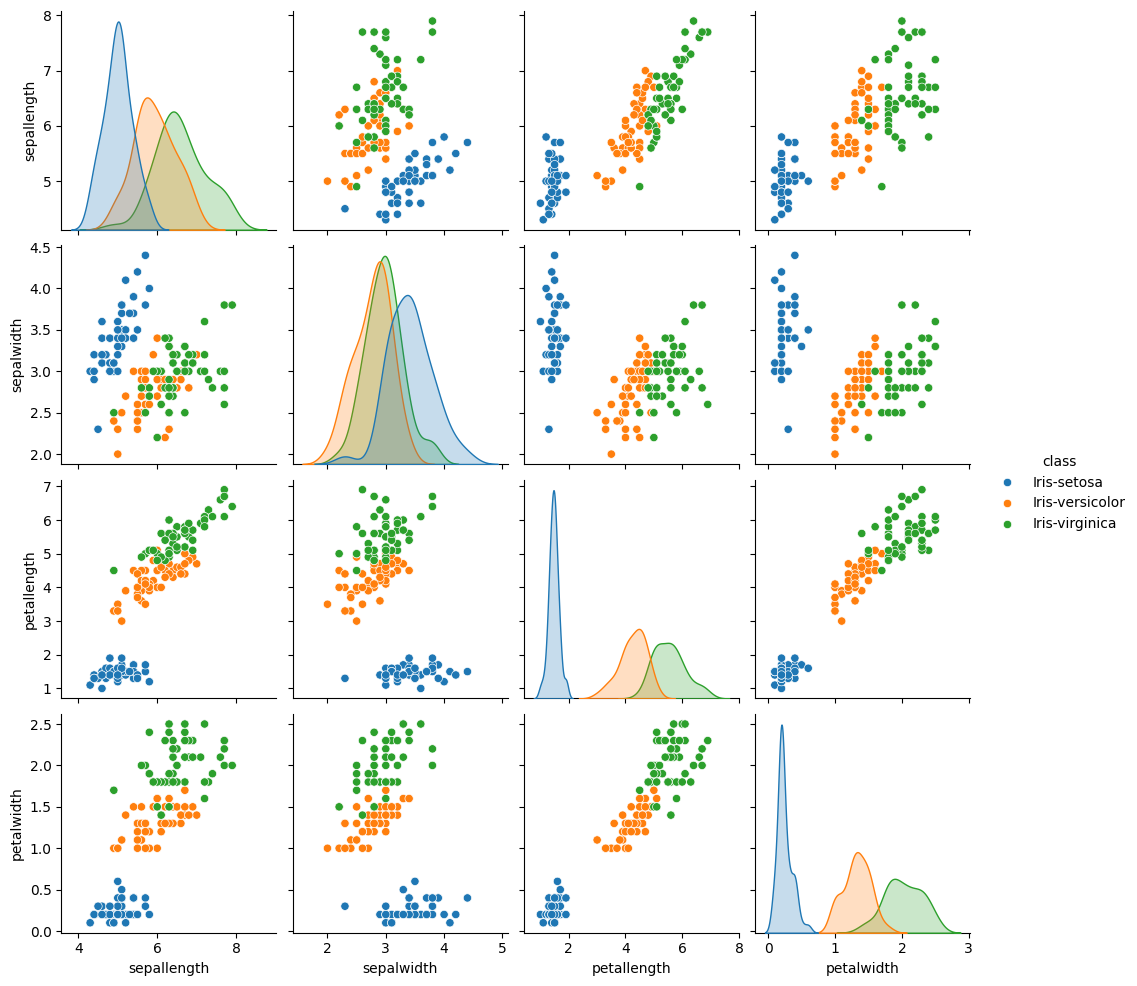

In [508]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, hue='class')
plt.show()

- Dalam pairplot ini, setiap pasangan variabel diplot satu sama lain. Misalnya, jika Anda memiliki empat variabel (sepallength, sepalwidth, petallength, dan petalwidth), maka akan ada 16 subplot, termasuk yang ada di diagonal.
- Diagonal, histogram dari setiap variabel diplot, yang menunjukkan distribusi univariat dari masing-masing variabel.
- Diagonal dari setiap subplot menunjukkan distribusi variabel terkait, sedangkan plot lain menunjukkan hubungan antara dua variabel.
- Dengan menggunakan parameter hue='class', titik-titik pada scatter plot diwarnai berdasarkan kelas yang sesuai. Hal ini memungkinkan kita untuk melihat bagaimana distribusi setiap kelas terhadap pasangan variabel yang berbeda.
>Melalui pairplot ini, kita dapat melihat hubungan antara variabel-variabel yang berbeda dalam dataset, serta bagaimana kelas-kelas yang berbeda dipisahkan atau bercampur dalam ruang fitur. Ini dapat memberikan wawasan yang berharga dalam pemahaman data dan mungkin mengarah pada pemilihan fitur yang lebih baik atau pemilihan model yang sesuai untuk analisis lebih lanjut.

<ipython-input-509-8ffe4e8593fe>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



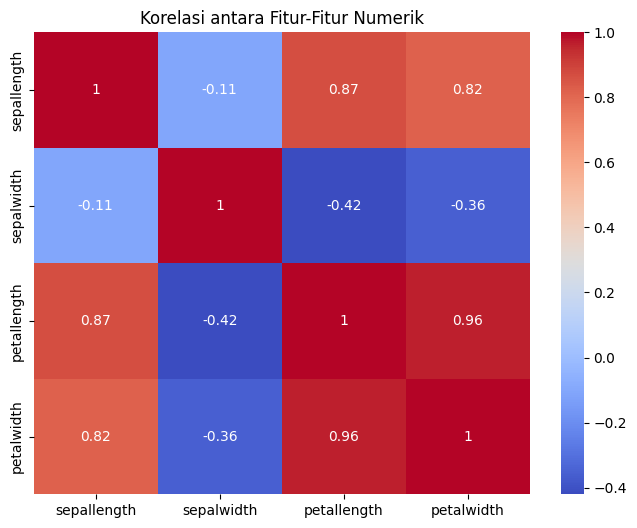

In [509]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Fitur-Fitur Numerik')
plt.show()

- Heatmap ini menunjukkan korelasi antara setiap pasangan fitur numerik dalam dataset.
- Setiap sel dalam heatmap menunjukkan nilai korelasi antara dua fitur. Nilai korelasi berkisar dari -1 hingga 1, di mana -1 menunjukkan korelasi negatif sempurna, 0 menunjukkan tidak adanya korelasi, dan 1 menunjukkan korelasi positif sempurna.
- Warna dalam heatmap menggambarkan kekuatan dan arah korelasi antara dua fitur, di mana warna yang lebih terang menunjukkan korelasi yang lebih kuat (baik positif maupun negatif) dan warna yang lebih gelap menunjukkan korelasi yang lebih lemah.
- Anotasi yang ditampilkan di dalam sel-sel heatmap menunjukkan nilai korelasi yang sesuai antara dua fitur.
>Dengan melihat heatmap ini, kita dapat mengidentifikasi fitur-fitur yang memiliki korelasi yang tinggi, yang dapat menjadi penting dalam pemilihan fitur atau pemodelan lebih lanjut. Korelasi yang tinggi antara dua fitur juga dapat mengindikasikan adanya multicollinearity, yang perlu diperhatikan dalam analisis regresi.

TAMBAHKAN VISUALISASI KORELASI BESERTA PENJELASANNYA LEBIH BAIK

##**Verify Data Quality**

####Missing Values

In [510]:
missing_values = df.isnull().sum()

print("Jumlah nilai yang hilang dalam setiap kolom:")
print(missing_values)

Jumlah nilai yang hilang dalam setiap kolom:
sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64


Jangan lupa juga untuk berikan penjelasan di sini (baik ada nilai kosong maupun gak ada nilai kosongnya)

####Outliers Values

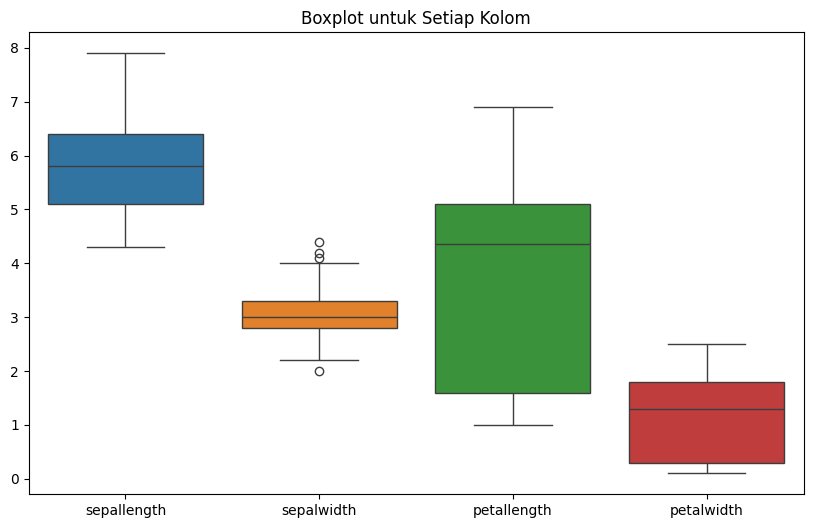

In [511]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot untuk Setiap Kolom')
plt.show()

Terdapat outliner pada kolom sepalwidht. Terdapat 1 nilai outliner yang berada dibawah nilai terkecil (min) dan terdapat 3 nilai outliner diata nilai terbesar (max)

####Duplicated Values

In [512]:
df[df.duplicated()]

,sepallength,sepalwidth,petallength,petalwidth,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Pada baris data ke 34, 37 dan 142 terdapat data yang duplikat

####Inconsistent Values / Noise (Optional)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)

#**DATA PREPARATION**

## Data Cleaning

### Penanganan missing value

#### Pengecekan missing value

In [513]:
print((df.isna().sum() / len(df)) * 100)

sepallength    0.0
sepalwidth     0.0
petallength    0.0
petalwidth     0.0
class          0.0
dtype: float64


berdasarkan data diatas, terbukti bahwa tidak ada data yang hilang yang artinya tidak terjadi kesalahan pada penginputan data

#### Hapus missing values

Dikarenakan tidak ada missing value dari keempat kolom numerik maka tidak ada yang perlu dihapus

#### Imputasi missing values

dikarenakan tidak ada missing value di dalam baris dari keepat kolom numerik maka tidak perlu melakukan missing values

#### Pengecekan ulang

In [514]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
sepallength,0.0
sepalwidth,0.0
petallength,0.0
petalwidth,0.0
class,0.0


setelah dilakukan pengecekan ulang tetap tidak terdapat data ya hilang (missing)

### Penanganan Duplicated Values

#### Pengecekan nilai duplikat

In [515]:
df[df.duplicated()]

,sepallength,sepalwidth,petallength,petalwidth,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


terdapat 3 baris yang duplikat setelah kita melakukan pengecekkan nilai yang duplikat

#### Hapus nilai duplikat

In [516]:
df = df.drop_duplicates()

In [517]:
df[df.duplicated()]

,sepallength,sepalwidth,petallength,petalwidth,class


setelah mengetahui nilai yang duplikat maka langkah selanjutnya menghapus nilai tersebut dan setelah itu dilakukan pengecekkan ulang dan tidak terdapat nilai duplikat lagi

setelah menghapus data yang duplikat kita lakukan pengecekan nilai duplikat dan sudah tertangani

### Penanganan Outliers

####Pengecekan Outliers

In [518]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
sepallength,0.000000
sepalwidth,2.721088
petallength,0.000000
petalwidth,0.000000


berdasarkan baris kode diatas, dapat dilihat terdapat 1 buah kolom yang memiliki outliers yaitu pada kolom "sepalwidth"

#### Hapus outliners

Secara umum, outliers di dalam dataset iris merupakan pengukuran yang valid dan tidak dianggap kesalahan pengukuran,sehingga tidak perlu dihapus

#### Imputasi outliners

In [519]:
Q1 = df['sepalwidth'].quantile(0.25)
Q3 = df['sepalwidth'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df['sepalwidth']=np.where(df['sepalwidth']>upper_whisker,upper_whisker,np.where(df['sepalwidth']<lower_whisker,lower_whisker,df['sepalwidth']))

<ipython-input-519-247454ff2316>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



hal ini bertujuan untuk mengganti nilai dari outliers. Jika terdapat outliers yang berada diatas nilai maksimum maka akan diganti dengan nilai upper_whisker sebaliknya jika terdapat outliers dibawah nilai minimum maka akan diganti nilainya dengan lower_whisker

#### Pengecekkan ulang

In [520]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
sepallength,0.0
sepalwidth,0.0
petallength,0.0
petalwidth,0.0


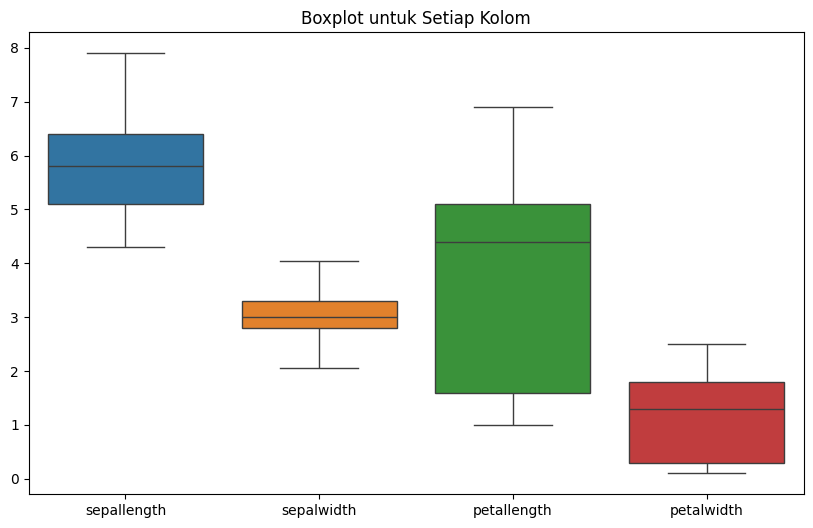

In [521]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot untuk Setiap Kolom')
plt.show()

setelah dilakukan flooring dan capping kita lihat pada gambar dan data di atas bahwa sudah tidak ada lagi data yang outliers:

##**Construct Data**

### Melakukan Rekayasa Fitur (Feature Engineering)

In [522]:
# Petal Length to Width Ratio
df['petal_length_width_ratio'] = df['petallength'] / df['petalwidth']

# Sepal Length to Width Ratio
df['sepal_length_width_ratio'] = df['sepallength'] / df['sepalwidth']

# Petal and Sepal Area
df['petal_area'] = df['petallength'] * df['petalwidth']
df['sepal_area'] = df['sepallength'] * df['sepalwidth']

Secara keseluruhan, tujuan dari kode di atas adalah untuk memperkaya representasi data dalam dataset iris dengan menambahkan fitur-fitur baru yang dapat meningkatkan kinerja model machine learning atau memberikan wawasan tambahan dalam analisis data.

###Pengecekan Hasil

In [523]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class,petal_length_width_ratio,sepal_length_width_ratio,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,7.0,1.457143,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,7.0,1.633333,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,6.5,1.468750,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,7.5,1.483871,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,7.0,1.388889,0.28,18.00


Pada tabel di atas, terdapat penambahan kolom baru yang disebut "petal_length_width_ratio","sepal_length_width_ratio","petal_area","sepal_area" di mana setiap kolom baru ditentukan berdasarkan hasil kali atau bagi dari data yang sudah ada

##**Data Reduction**

###Mengurangi fitur-fitur yang kurang relevan

In [524]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

In [525]:
# Menghapus fitur-fitur yang tidak relevan
df2 = df.drop(['petal_length_width_ratio', 'sepal_length_width_ratio'], axis=1)

berdasarkan kode di atas "petal_length_width_ratio" dan "sepal_length_width_ratio" akan di hapus dari tabel tabel dikarenakan
perbandingan panjang dan lebar kelopak bunga mungkin tidak memberikan informasi yang signifikan dalam konteks analisis ini dan juga kita melakukan backup data semisal data dengan kolom tersebut masih dibutuhkan

###pengecekan hasil

In [526]:
# Menampilkan lima baris pertama dari DataFrame setelah fitur-fitur yang tidak relevan dihapus
df2.head()

,sepallength,sepalwidth,petallength,petalwidth,class,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,Iris-setosa,0.28,17.85
1,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70
2,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04
3,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26
4,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00


Pada tabel di atas, terdapat kolom "petal_length_width_ratio" dan "sepal_length_width_ratio" yang sebelumnya ada, namun setelah dilakukan pembersihan data, kolom-kolom tersebut telah dihapus.

##**Data Transformation**

###Mapping

In [527]:
df2['class'] = df2['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1,'Iris-virginica': 2}).astype(int)

Pada sintaks di atas, tujuannya adalah untuk memudahkan identifikasi setiap jenis class dengan memberikan kode numerik tertentu. Dalam hal ini, jenis class "Iris-setosa" direpresentasikan dengan angka 0, "Iris-versicolor" dengan angka 1, dan "Iris-virginica" dengan angka 2. Hal ini membantu dalam analisis data dan pemrosesan oleh model atau algoritma machine learning.

###Encoding

In [528]:
# df = pd.get_dummies(df)

dikarenakan pada saat modelling dibutuhkan kolom "class" maka saya memilih untuk dilakukan mapping daripada encoding

###Pengecekan Hasil

In [529]:
df2

,sepallength,sepalwidth,petallength,petalwidth,class,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0,0.28,17.85
1,4.9,3.0,1.4,0.2,0,0.28,14.70
2,4.7,3.2,1.3,0.2,0,0.26,15.04
3,4.6,3.1,1.5,0.2,0,0.30,14.26
4,5.0,3.6,1.4,0.2,0,0.28,18.00
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,11.96,20.10
146,6.3,2.5,5.0,1.9,2,9.50,15.75
147,6.5,3.0,5.2,2.0,2,10.40,19.50
148,6.2,3.4,5.4,2.3,2,12.42,21.08


dapat dilihat pada tabel diatas kolom "class" nilai nya sudah menjadi numerik

## Konversi Dataframe

In [530]:
df2.to_csv('Data Cleaned.csv', index=False)

# **Modelling**

## Modelling Predict

### Pre-Processing

#### Split Data

In [531]:
x = df2.drop('class', axis=1)
y = df2['class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

kode diatas berguna untuk memisahkan dataset menjadi fitur (semua kolom kecuali kolom class (`x`)) dan target (kolom class (`y`)) lalu membagi kedua nya jadi data latih dan data uji menggunakan fungsi train_test_split() dari library skicit learn

#### Normalisasi Data

In [532]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

baris kode diatas berfungsi untuk melakukan normaslisasi data menggunakan MinMaxScaler() pada fitur kita agar tidak ada skala yang melonjak

### Build and Train Model

#### Gaussian Naive Bayes

In [533]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

kode tersebut menggunakan algoritma Gaussian Naive Bayes untuk melatih sebuah model mesin dengan data latih yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train). Proses pelatihan ini melibatkan pembelajaran pola dari data latih untuk digunakan dalam membuat prediksi pada data baru di masa depan.

#### K-Nearest Neighbor

In [534]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

kode tersebut menggunakan algoritma K-Nearest Neighbor untuk melatih sebuah model mesin dengan data latih yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train). Proses pelatihan ini melibatkan pembelajaran pola dari data latih untuk digunakan dalam membuat prediksi pada data baru di masa depan.

#### Decision Tree

In [535]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

kode tersebut menggunakan algoritma Decision Tree untuk melatih sebuah model mesin dengan data latih yang telah dinormalisasi (x_train_norm) dan label yang sesuai (y_train). Proses pelatihan ini melibatkan pembelajaran pola dari data latih untuk digunakan dalam membuat prediksi pada data baru di masa depan.

### Begins and Compare Predict

In [536]:
gnb_pred = gnb.predict(x_test_norm)
gnb_proba = gnb.predict_proba(x_test_norm)
knn_pred = knn.predict(x_test_norm)
knn_proba = knn.predict_proba(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)
dtc_proba = dtc.predict_proba(x_test_norm)

baris kode diatas berguna untuk melakukan prediksi label dari data uji yang telah dinormalisasi menggunakan tiga model yang telah dilatih sebelumnya

In [537]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

bariis kode tersebut mengelola data hasil prediksi dan data uji asli sebagai berikut:

1. Data uji (`x_test`) dan label asli (`y_test`) dikonversi menjadi DataFrame dan indeksnya diatur ulang.

2. Hasil prediksi dari tiga model (Gaussian Naive Bayes, k-Nearest Neighbors, dan Decision Tree Classifier) juga dikonversi menjadi DataFrame dan disimpan dalam kolom terpisah.

3. Semua data (fitur dari data uji, label asli, dan hasil prediksi dari ketiga model) digabungkan menjadi satu DataFrame tunggal untuk analisis lebih lanjut atau evaluasi kinerja model.

In [538]:
combined_data

,sepallength,sepalwidth,petallength,petalwidth,petal_area,sepal_area,class,gnb_prediction,knn_prediction,dtc_prediction
0,6.1,3.0,4.9,1.8,8.82,18.30,2,2,2,2
1,5.5,2.3,4.0,1.3,5.20,12.65,1,1,1,1
2,6.7,3.1,5.6,2.4,13.44,20.77,2,2,2,2
3,5.1,3.8,1.5,0.3,0.45,19.38,0,0,0,0
4,4.9,2.5,4.5,1.7,7.65,12.25,2,1,1,2
5,4.8,3.0,1.4,0.1,0.14,14.40,0,0,0,0
6,6.0,2.9,4.5,1.5,6.75,17.40,1,1,1,1
7,5.4,3.4,1.5,0.4,0.60,18.36,0,0,0,0
8,6.0,2.7,5.1,1.6,8.16,16.20,1,1,2,2
9,4.9,3.1,1.5,0.1,0.15,15.19,0,0,0,0


berikut adalah sampel data yang sudah train digabungkan dengan dataframe yang sudah clean

### Visualisasi

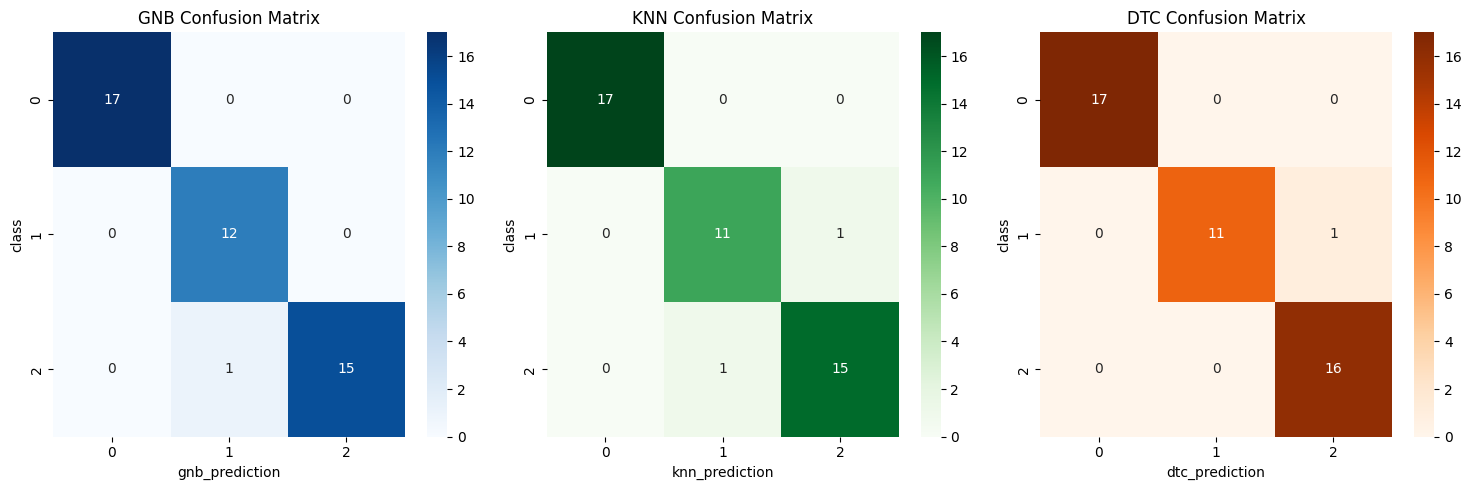

In [539]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(pd.crosstab(combined_data["class"], combined_data["gnb_prediction"]), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(pd.crosstab(combined_data["class"], combined_data["knn_prediction"]), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(pd.crosstab(combined_data["class"], combined_data["dtc_prediction"]), annot=True, cmap="Oranges")
plt.title('DTC Confusion Matrix')

plt.tight_layout()
plt.show()

pada sumbu Y itu adalah class yang sudah kita mapping menjadi numerik, dan sumbu X adalah class prediksi dari metode yang sudah kita gunakan. Kita ambil contoh pada metode KNN:

- pada class 0 (iris_setosa) menurut metode KNN terdapat 17 class yang terindikasi class 0 (iris_setosa)

- pada class 1 (iris_versicolor) menurut metode KNN terdapat 11 class yang terindikasi class 1 (iris_versicolor) dan terdapat 1 class yang terindikasi class 2 (iris_virginca)

- pada class 2 (iris_virginica) menurut metode KNN terdapat 1 class yang terindikasi class 1 (iris_versicolor) dan terdapat 15 class yang terindikasi class 2 (iris_virginica)

## Modelling Associate

### Pre-Processing

#### Adjusment

In [540]:
x_final = df2.drop("class", axis=1)

selanjutnya kita menghapus kolom class untuk melakukan normalisasi

#### Normalisasi Data

In [541]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

melakukan normalisasi pada dataframe yang disiapkan untuk melakukan validasi silang

#### Validasi Silang

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

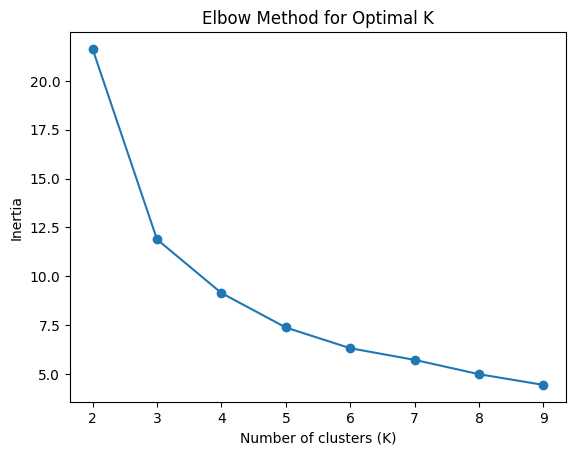

In [542]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Grafik tersebut menunjukkan bagaimana nilai inertia berubah seiring dengan peningkatan jumlah cluster dalam algoritma KMeans. Peneliti dapat menggunakan grafik ini untuk menentukan jumlah optimal dari cluster dengan mencari titik "elbow", di mana penurunan inertia mulai melambat secara signifikan. Jumlah cluster optimal biasanya dipilih di sekitar titik elbow ini karena penambahan cluster lebih lanjut tidak memberikan penurunan yang signifikan dalam variance intra-cluster.

### Build Model

#### K-Means

In [543]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3, random_state=42)

Inisialisasi Model: Membuat objek model K-Means dengan jumlah kluster yang diinginkan (dalam kasus ini, 4) dan menetapkan keadaan awal untuk memastikan hasil yang konsisten.

Pelatihan Model: Melatih model K-Means dengan data yang telah dinormalisasi (x_final_norm).

Clustering Data: Setelah melatih model, algoritma K-Means mengelompokkan data ke dalam 4 kelompok berdasarkan pola yang ditemukan dalam fitur-fitur data.

#### Hierarchical Clustering

Dengan menggunakan algoritma Hierarchical Clustering, Kita dapat mengelompokkan data ke dalam struktur hierarkis, di mana kluster-kluster yang lebih kecil akan digabungkan menjadi kluster yang lebih besar berdasarkan kemiripan antara mereka. Hal ini memungkinkan Anda untuk mengidentifikasi pola-pola hierarkis dalam data Anda.

In [544]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

pada kode kita membagi menjadi 4 klaster

### Begins and Compare Clusters

In [545]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



Dengan menggunakan model-model clustering yang telah dilatih sebelumnya, kita dapat memprediksi kluster untuk data baru dan menggunakan informasi kluster tersebut untuk analisis lebih lanjut atau pengambilan keputusan.

In [546]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [547]:
combined_data_assoc

,sepallength,sepalwidth,petallength,petalwidth,petal_area,sepal_area,kmeans_cluster,hierarchy_cluster
0,5.1,3.5,1.4,0.2,0.28,17.85,1,1
1,4.9,3.0,1.4,0.2,0.28,14.70,1,1
2,4.7,3.2,1.3,0.2,0.26,15.04,1,1
3,4.6,3.1,1.5,0.2,0.30,14.26,1,1
4,5.0,3.6,1.4,0.2,0.28,18.00,1,1
...,...,...,...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,11.96,20.10,0,2
143,6.3,2.5,5.0,1.9,9.50,15.75,2,0
144,6.5,3.0,5.2,2.0,10.40,19.50,0,0
145,6.2,3.4,5.4,2.3,12.42,21.08,0,2


menggabungkan data fitur dengan hasil clustering dari model K-Means dan Hierarchical Clustering menjadi satu dataset yang lengkap. Dengan cara ini, kita dapat memiliki satu dataset yang berisi fitur-fitur dari data asli bersama dengan label kluster yang telah diprediksi oleh kedua model clustering. Hal ini memungkinkan kita untuk melakukan analisis lebih lanjut atau visualisasi terhadap pola-pola yang terdapat dalam data berdasarkan kluster-kluster yang telah dibentuk.

### Visualisasi

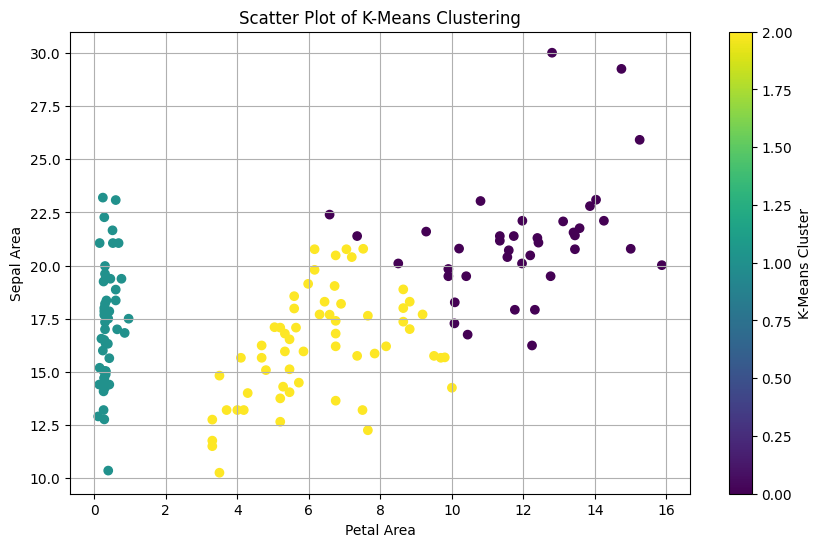

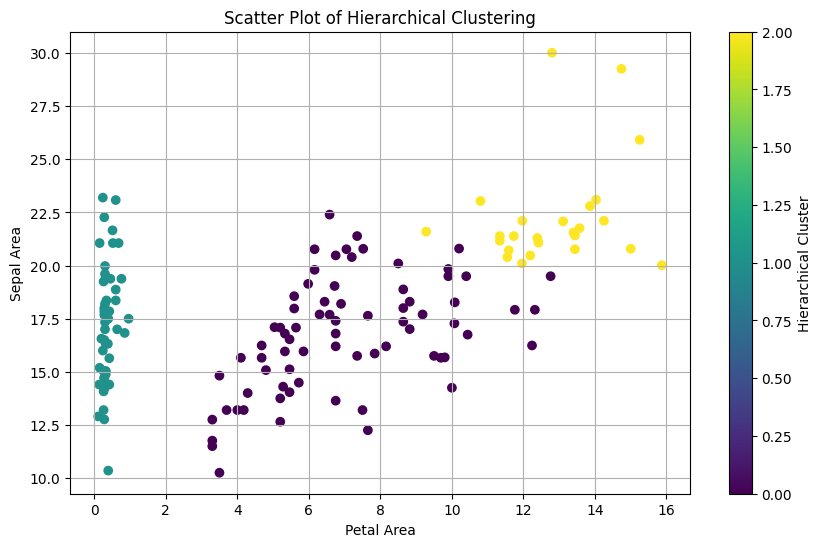

In [548]:
# Scatter plot untuk hasil clustering K-Means
plt.figure(figsize=(10, 6))
plt.scatter(combined_data_assoc['petal_area'], combined_data_assoc['sepal_area'], c=combined_data_assoc["kmeans_cluster"], cmap='viridis')
plt.xlabel('Petal Area')
plt.ylabel('Sepal Area')
plt.title('Scatter Plot of K-Means Clustering')
plt.colorbar(label='K-Means Cluster')
plt.grid(True)
plt.show()

# Scatter plot untuk hasil clustering Hierarchical
plt.figure(figsize=(10, 6))
plt.scatter(combined_data_assoc['petal_area'], combined_data_assoc['sepal_area'], c=combined_data_assoc["hierarchy_cluster"], cmap='viridis')
plt.xlabel('Petal Area')
plt.ylabel('Sepal Area')
plt.title('Scatter Plot of Hierarchical Clustering')
plt.colorbar(label='Hierarchical Cluster')
plt.grid(True)
plt.show()


Pada diagram diatas kita dapat mengidentifikasi cluster berdasarkan sepal_area (sumbu x) dan petal_area (sumbu y) dan juga terbagi menjadi 3 cluster

## Tensorflow Classification (Extras)

In [549]:
import tensorflow as tf
from tensorflow import keras

In [550]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

In [551]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [552]:
model.fit(x_train_norm, y_train, epochs=10, batch_size=32, validation_data=(x_test_norm, y_test))

Epoch 1/10
4/4 [==============================] - 1s 71ms/step - loss: 0.5883 - accuracy: 0.3725 - val_loss: 0.5270 - val_accuracy: 0.2667
Epoch 2/10
4/4 [==============================] - 0s 16ms/step - loss: 0.5043 - accuracy: 0.3725 - val_loss: 0.4445 - val_accuracy: 0.2667
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 0.4241 - accuracy: 0.3725 - val_loss: 0.3653 - val_accuracy: 0.2667
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 0.3498 - accuracy: 0.3725 - val_loss: 0.2904 - val_accuracy: 0.2667
Epoch 5/10
4/4 [==============================] - 0s 14ms/step - loss: 0.2756 - accuracy: 0.3725 - val_loss: 0.2184 - val_accuracy: 0.2667
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.2019 - accuracy: 0.3725 - val_loss: 0.1444 - val_accuracy: 0.2667
Epoch 7/10
4/4 [==============================] - 0s 18ms/step - loss: 0.1320 - accuracy: 0.3725 - val_loss: 0.0684 - val_accuracy: 0.2667
Epoch 8/10
4/4 [===========

In [553]:
tf_pred_prob = model.predict(x_test_norm)

tf_pred = np.argmax(tf_pred_prob, axis=1)

tf_col = pd.DataFrame(tf_pred, columns=["tf_prediction"])

final_data = pd.concat([combined_data, tf_col], axis=1)

2/2 [==============================] - 0s 5ms/step


In [554]:
final_data

,sepallength,sepalwidth,petallength,petalwidth,petal_area,sepal_area,class,gnb_prediction,knn_prediction,dtc_prediction,tf_prediction
0,6.1,3.0,4.9,1.8,8.82,18.30,2,2,2,2,0
1,5.5,2.3,4.0,1.3,5.20,12.65,1,1,1,1,0
2,6.7,3.1,5.6,2.4,13.44,20.77,2,2,2,2,0
3,5.1,3.8,1.5,0.3,0.45,19.38,0,0,0,0,0
4,4.9,2.5,4.5,1.7,7.65,12.25,2,1,1,2,0
5,4.8,3.0,1.4,0.1,0.14,14.40,0,0,0,0,0
6,6.0,2.9,4.5,1.5,6.75,17.40,1,1,1,1,0
7,5.4,3.4,1.5,0.4,0.60,18.36,0,0,0,0,0
8,6.0,2.7,5.1,1.6,8.16,16.20,1,1,2,2,0
9,4.9,3.1,1.5,0.1,0.15,15.19,0,0,0,0,0


# **Evaluation**

## Evaluate Result

### Klafikasi

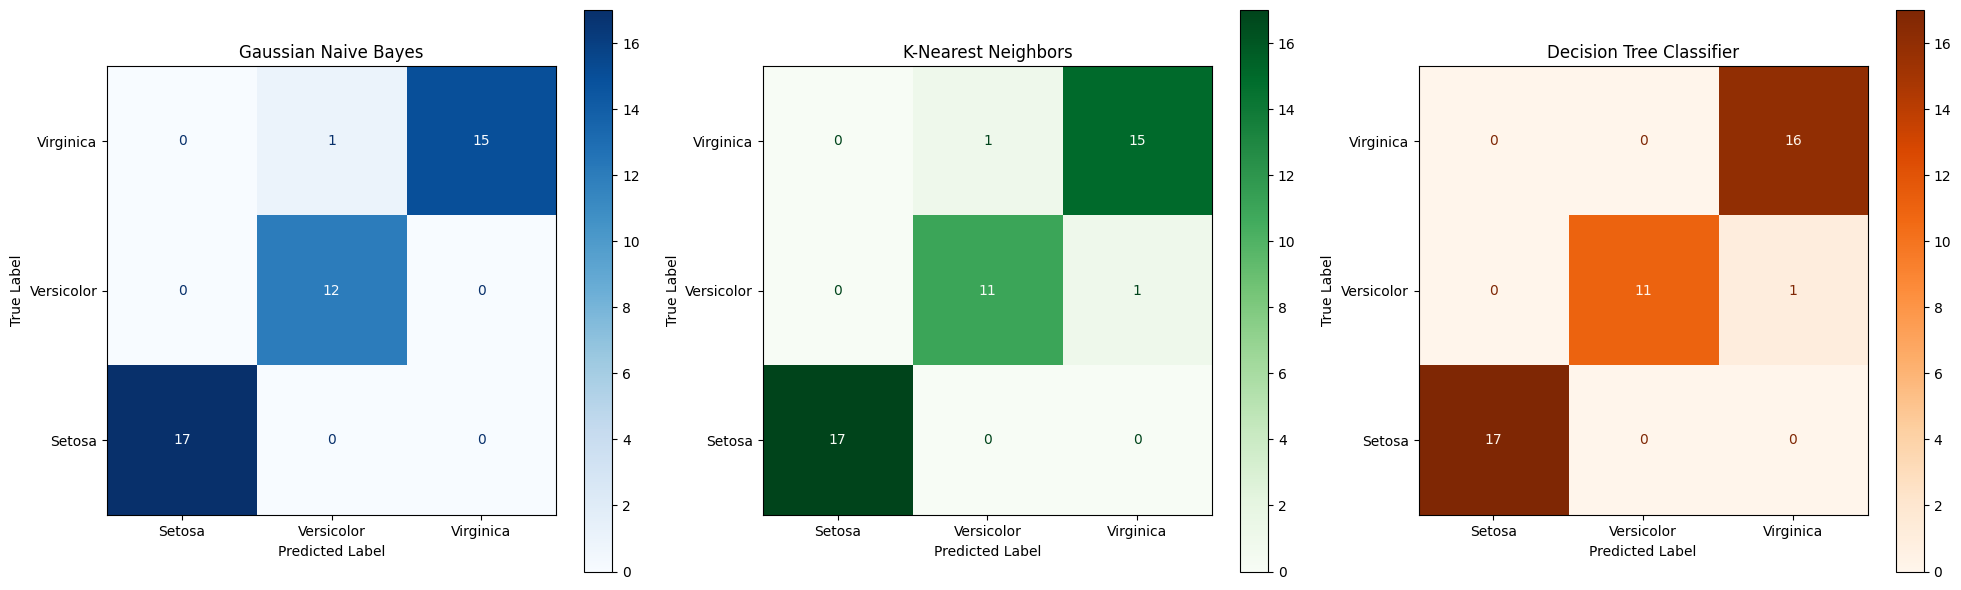

In [555]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

class_names = ["Setosa", "Versicolor", "Virginica"]  # Ganti dengan nama kelas yang sesuai

# Heatmap 1 - Gaussian Naive Bayes Confusion Matrix
gnb_cm = confusion_matrix(y_test, gnb_pred)
gnb_cm_display = ConfusionMatrixDisplay(gnb_cm, display_labels=class_names).plot(ax=axes[0], cmap='Blues')
gnb_cm_display.ax_.set_title("Gaussian Naive Bayes")
gnb_cm_display.ax_.set_xlabel('Predicted Label')
gnb_cm_display.ax_.set_ylabel('True Label')
gnb_cm_display.ax_.invert_yaxis()

# Heatmap 2 - K-Nearest Neighbors Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm_display = ConfusionMatrixDisplay(knn_cm, display_labels=class_names).plot(ax=axes[1], cmap='Greens')
knn_cm_display.ax_.set_title("K-Nearest Neighbors")
knn_cm_display.ax_.set_xlabel('Predicted Label')
knn_cm_display.ax_.set_ylabel('True Label')
knn_cm_display.ax_.invert_yaxis()

# Heatmap 3 - Decision Tree Classifier Confusion Matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)
dtc_cm_display = ConfusionMatrixDisplay(dtc_cm, display_labels=class_names).plot(ax=axes[2], cmap='Oranges')
dtc_cm_display.ax_.set_title("Decision Tree Classifier")
dtc_cm_display.ax_.set_xlabel('Predicted Label')
dtc_cm_display.ax_.set_ylabel('True Label')
dtc_cm_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()


GNB
- Terdapat 17 Predicted label Setosa yang sesuai dengan label Setosa True (nyata) nya

- Terdapat 12 Predicted label versicolor yang sesuai dengan label versicolor True (nyata) nya dan terdapat 1 predicted label Versicolor yang tidak sesuai dengan true label versicolor melainkan label virginica

- Terdapat 15 Predicted label virginica yang sesuai dengan label virginica True (nyata) nya

KNN
- Terdapat 17 Predicted label Setosa yang sesuai dengan label Setosa True (nyata) nya

- Terdapat 11 Predicted label versicolor yang sesuai dengan label versicolor True (nyata) nya dan terdapat 1 predicted label Versicolor yang tidak sesuai dengan true label versicolor melainkan label virginica

- Terdapat 15 Predicted label Virginica yang sesuai dengan label Virginica True (nyata) nya dan terdapat 1 predicted label Virginica yang tidak sesuai dengan true label Virginica melainkan label Versicolor

DTC
- Terdapat 17 Predicted label Setosa yang sesuai dengan label Setosa True (nyata) nya

- Terdapat 11 Predicted label Versicolor yang sesuai dengan label Versicolor True (nyata) nya

- Terdapat 16 Predicted label Virginica yang sesuai dengan label Virginica True (nyata) nya dan terdapat 1 predicted label virginica yang tidak sesuai dengan true label Virginica melainkan label Versicolor

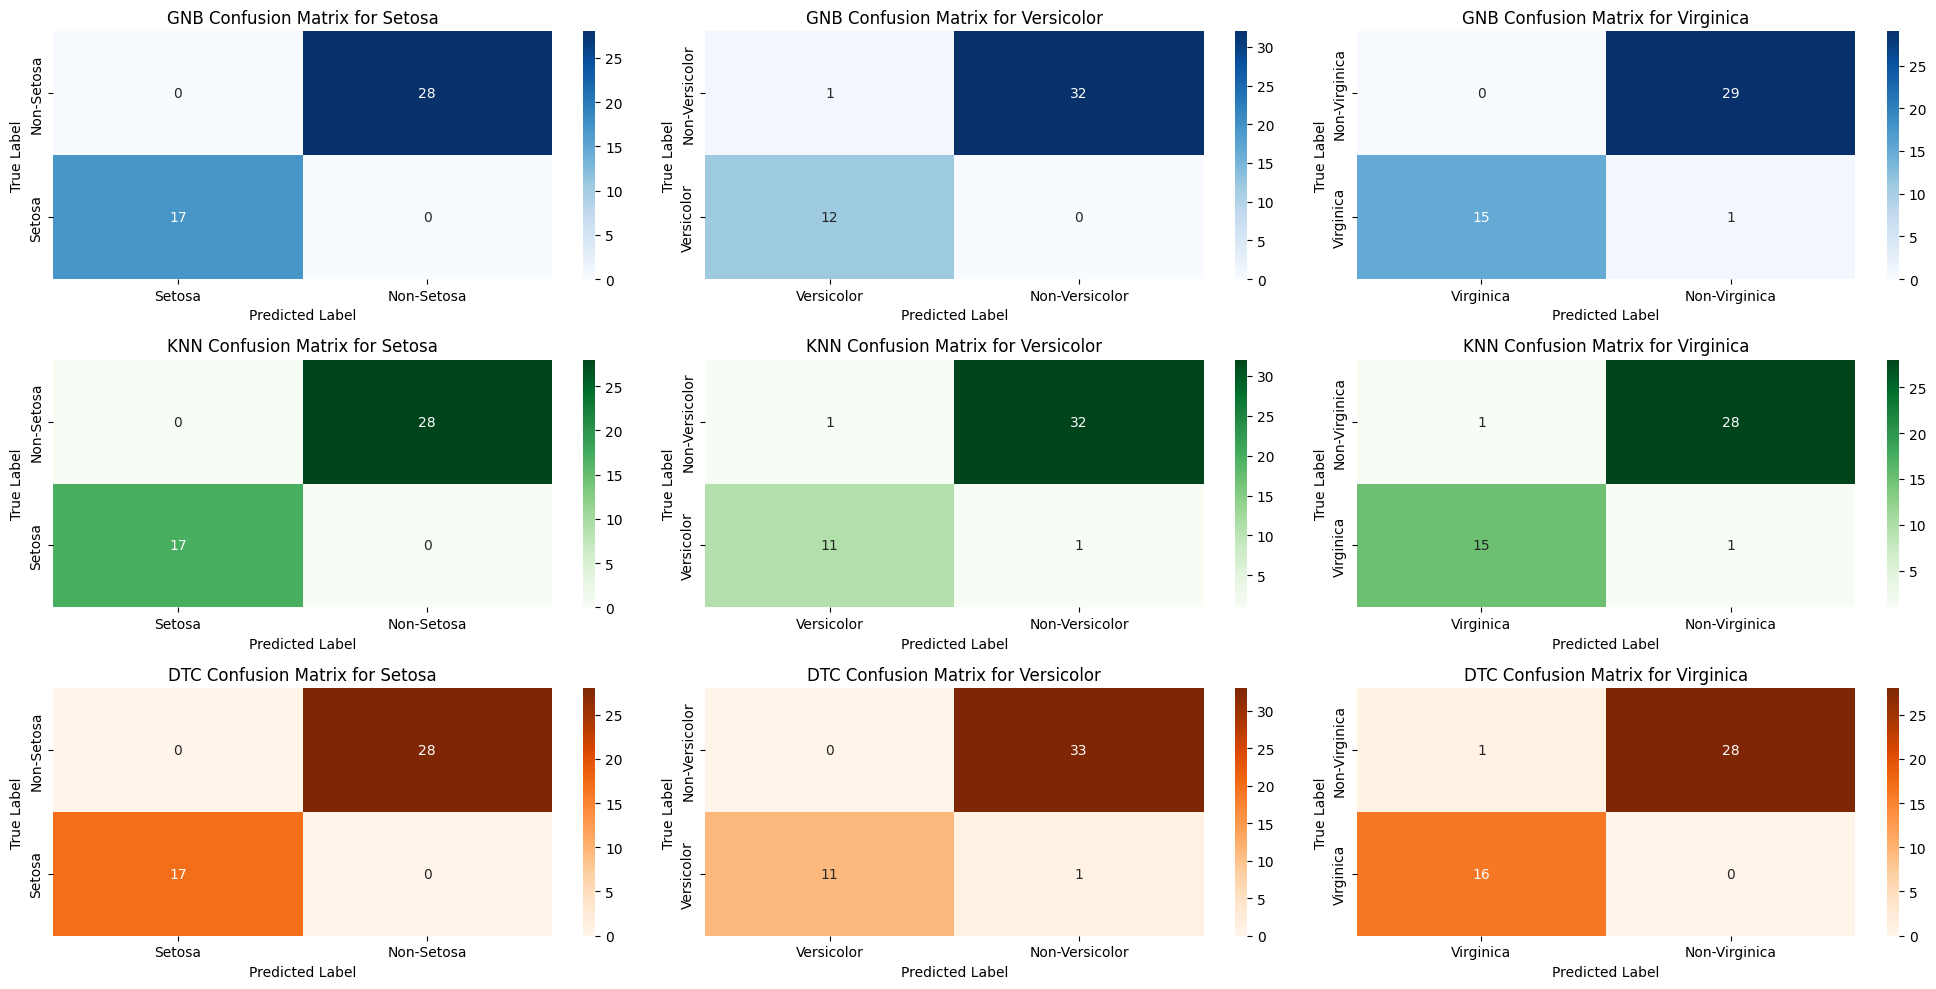

In [556]:
# versi manual ╰（‵□′）╯

plt.figure(figsize=(20, 10))

class_names = [0,1,2]
matrix1 = gnb_cm
matrix2 = knn_cm
matrix3 = dtc_cm

TN_manual_setosa = matrix1[1, 1] + matrix1[1, 2] + matrix1[2, 1] + matrix1[2, 2]
TN_manual_versicolor = matrix1[0, 0] + matrix1[0, 2] + matrix1[2, 0] + matrix1[2, 2]
TN_manual_virginica = matrix1[0, 0] + matrix1[0, 1] + matrix1[1, 0] + matrix1[1, 1]

plt.subplot(3, 3, 1)
sns.heatmap(pd.DataFrame([[matrix1[0, 0], matrix1[0, 1] + matrix1[0, 2]],
                          [matrix1[1, 0] + matrix1[2, 0], TN_manual_setosa]],
                         index=['Setosa', 'Non-Setosa'], columns=['Setosa', 'Non-Setosa']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for Setosa')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 2)
sns.heatmap(pd.DataFrame([[matrix1[1, 1], matrix1[1, 0] + matrix1[1, 2]],
                          [matrix1[0, 1] + matrix1[2, 1], TN_manual_versicolor]],
                         index=['Versicolor', 'Non-Versicolor'], columns=['Versicolor', 'Non-Versicolor']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for Versicolor')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 3)
sns.heatmap(pd.DataFrame([[matrix1[2, 2], matrix1[2, 0] + matrix1[2, 1]],
                          [matrix1[0, 2] + matrix1[1, 2], TN_manual_virginica]],
                         index=['Virginica', 'Non-Virginica'], columns=['Virginica', 'Non-Virginica']), annot=True, cmap="Blues")
plt.title('GNB Confusion Matrix for Virginica')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()


TN_manual_setosa = matrix2[1, 1] + matrix2[1, 2] + matrix2[2, 1] + matrix2[2, 2]
TN_manual_versicolor = matrix2[0, 0] + matrix2[0, 2] + matrix2[2, 0] + matrix2[2, 2]
TN_manual_virginica = matrix2[0, 0] + matrix2[0, 1] + matrix2[1, 0] + matrix2[1, 1]


plt.subplot(3, 3, 4)
sns.heatmap(pd.DataFrame([[matrix2[0, 0], matrix2[0, 1] + matrix2[0, 2]],
                          [matrix2[1, 0] + matrix2[2, 0], TN_manual_setosa]],
                         index=['Setosa', 'Non-Setosa'], columns=['Setosa', 'Non-Setosa']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for Setosa')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 5)
sns.heatmap(pd.DataFrame([[matrix2[1, 1], matrix2[1, 0] + matrix2[1, 2]],
                          [matrix2[0, 1] + matrix2[2, 1], TN_manual_versicolor]],
                         index=['Versicolor', 'Non-Versicolor'], columns=['Versicolor', 'Non-Versicolor']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for Versicolor')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 6)
sns.heatmap(pd.DataFrame([[matrix2[2, 2], matrix2[2, 0] + matrix2[2, 1]],
                          [matrix2[0, 2] + matrix2[1, 2], TN_manual_virginica]],
                         index=['Virginica', 'Non-Virginica'], columns=['Virginica', 'Non-Virginica']), annot=True, cmap="Greens")
plt.title('KNN Confusion Matrix for Virginica')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

TN_manual_setosa = matrix3[1, 1] + matrix3[1, 2] + matrix3[2, 1] + matrix3[2, 2]
TN_manual_versicolor = matrix3[0, 0] + matrix3[0, 2] + matrix3[2, 0] + matrix3[2, 2]
TN_manual_virginica = matrix3[0, 0] + matrix3[0, 1] + matrix3[1, 0] + matrix3[1, 1]

plt.subplot(3, 3, 7)
sns.heatmap(pd.DataFrame([[matrix3[0, 0], matrix3[0, 1] + matrix3[0, 2]],
                          [matrix3[1, 0] + matrix3[2, 0], TN_manual_setosa]],
                         index=['Setosa', 'Non-Setosa'], columns=['Setosa', 'Non-Setosa']), annot=True, cmap="Oranges")
plt.title('DTC Confusion Matrix for Setosa')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 8)
sns.heatmap(pd.DataFrame([[matrix3[1, 1], matrix3[1, 0] + matrix3[1, 2]],
                          [matrix3[0, 1] + matrix3[2, 1], TN_manual_versicolor]],
                         index=['Versicolor', 'Non-Versicolor'], columns=['Versicolor', 'Non-Versicolor']), annot=True, cmap="Oranges")
plt.title('DTC Confusion Matrix for Versicolor')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.subplot(3, 3, 9)
sns.heatmap(pd.DataFrame([[matrix3[2, 2], matrix3[2, 0] + matrix3[2, 1]],
                          [matrix3[0, 2] + matrix3[1, 2], TN_manual_virginica]],
                         index=['Virginica', 'Non-Virginica'], columns=['Virginica', 'Non-Virginica']), annot=True, cmap="Oranges")
plt.title('DTC Confusion Matrix for Virginica')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

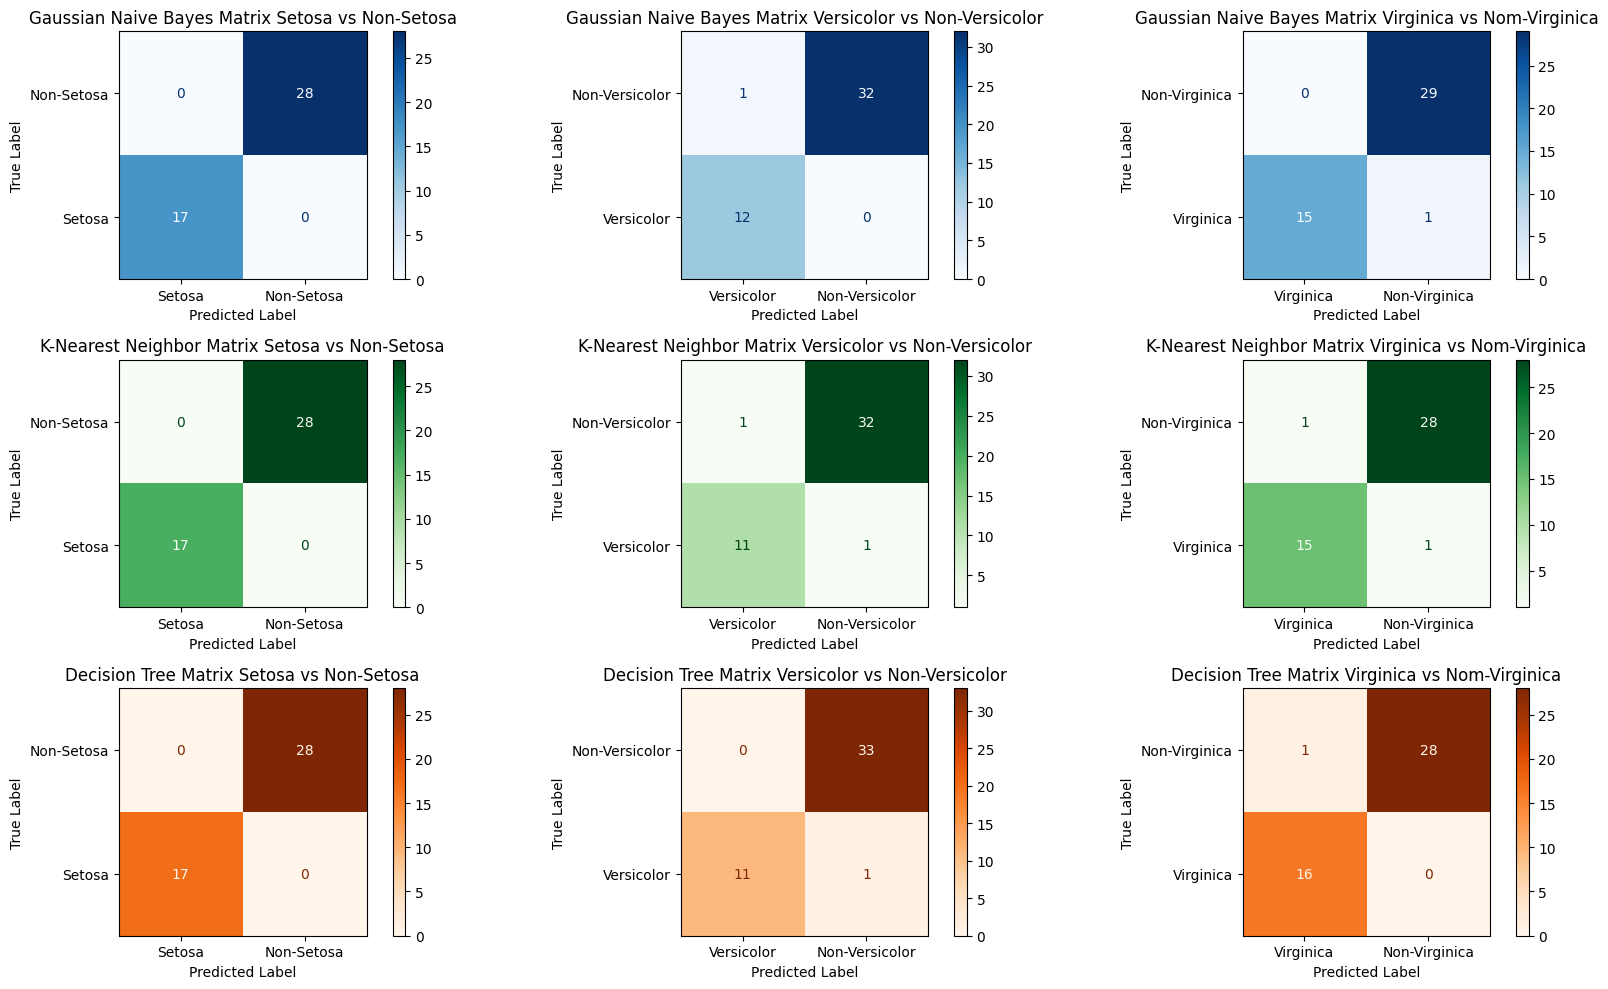

In [557]:
# Versi Otomatis ┗( T﹏T )┛

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))

y_test_setosaOvR = [0 if y == 0 else 1 for y in y_test['class']]
y_test_versicolorOvR = [0 if y == 1 else 1 for y in y_test['class']]
y_test_virginicaOvR = [0 if y == 2 else 1 for y in y_test['class']]

gnb_pred_setosaOvR = [0 if y == 0 else 1 for y in gnb_pred]
gnb_pred_versicolorOvR = [0 if y == 1 else 1 for y in gnb_pred]
gnb_pred_virginicaOvR = [0 if y == 2 else 1 for y in gnb_pred]

knn_pred_setosaOvR = [0 if y == 0 else 1 for y in knn_pred]
knn_pred_versicolorOvR = [0 if y == 1 else 1 for y in knn_pred]
knn_pred_virginicaOvR = [0 if y == 2 else 1 for y in knn_pred]

dtc_pred_setosaOvR = [0 if y == 0 else 1 for y in dtc_pred]
dtc_pred_versicolorOvR = [0 if y == 1 else 1 for y in dtc_pred]
dtc_pred_virginicaOvR = [0 if y == 2 else 1 for y in dtc_pred]

#----------------------------------------GNB OvR cONFUSION Matrix---------------------------------------------


gnb_cm_setosaOvR = confusion_matrix(y_test_setosaOvR, gnb_pred_setosaOvR)
gnb_cm_setosaOvR_display = ConfusionMatrixDisplay(gnb_cm_setosaOvR).plot(ax=axes[0,0], cmap='Blues')
gnb_cm_setosaOvR_display.ax_.set_title("Gaussian Naive Bayes Matrix Setosa vs Non-Setosa")
gnb_cm_setosaOvR_display.ax_.set_xlabel('Predicted Label')
gnb_cm_setosaOvR_display.ax_.set_ylabel('True Label')
gnb_cm_setosaOvR_display.ax_.set_xticklabels(['Setosa', 'Non-Setosa'])
gnb_cm_setosaOvR_display.ax_.set_yticklabels(['Setosa', 'Non-Setosa'])
gnb_cm_setosaOvR_display.ax_.invert_yaxis()

gnb_cm_versicolorOvR = confusion_matrix(y_test_versicolorOvR, gnb_pred_versicolorOvR)
gnb_cm_versicolorOvR_display = ConfusionMatrixDisplay(gnb_cm_versicolorOvR).plot(ax=axes[0,1], cmap='Blues')
gnb_cm_versicolorOvR_display.ax_.set_title("Gaussian Naive Bayes Matrix Versicolor vs Non-Versicolor")
gnb_cm_versicolorOvR_display.ax_.set_xlabel('Predicted Label')
gnb_cm_versicolorOvR_display.ax_.set_ylabel('True Label')
gnb_cm_versicolorOvR_display.ax_.set_xticklabels(['Versicolor', 'Non-Versicolor'])
gnb_cm_versicolorOvR_display.ax_.set_yticklabels(['Versicolor', 'Non-Versicolor'])
gnb_cm_versicolorOvR_display.ax_.invert_yaxis()

gnb_cm_virginicaOvR = confusion_matrix(y_test_virginicaOvR, gnb_pred_virginicaOvR)
gnb_cm_virginicaOvR_display = ConfusionMatrixDisplay(gnb_cm_virginicaOvR).plot(ax=axes[0,2], cmap='Blues')
gnb_cm_virginicaOvR_display.ax_.set_title("Gaussian Naive Bayes Matrix Virginica vs Nom-Virginica")
gnb_cm_virginicaOvR_display.ax_.set_xlabel('Predicted Label')
gnb_cm_virginicaOvR_display.ax_.set_ylabel('True Label')
gnb_cm_virginicaOvR_display.ax_.set_xticklabels(['Virginica', 'Non-Virginica'])
gnb_cm_virginicaOvR_display.ax_.set_yticklabels(['Virginica', 'Non-Virginica'])
gnb_cm_virginicaOvR_display.ax_.invert_yaxis()

#----------------------------------------KNN OvR cONFUSION Matrix---------------------------------------------

knn_cm_setosaOvR = confusion_matrix(y_test_setosaOvR, knn_pred_setosaOvR)
knn_cm_setosaOvR_display = ConfusionMatrixDisplay(knn_cm_setosaOvR).plot(ax=axes[1,0], cmap='Greens')
knn_cm_setosaOvR_display.ax_.set_title("K-Nearest Neighbor Matrix Setosa vs Non-Setosa")
knn_cm_setosaOvR_display.ax_.set_xlabel('Predicted Label')
knn_cm_setosaOvR_display.ax_.set_ylabel('True Label')
knn_cm_setosaOvR_display.ax_.set_xticklabels(['Setosa', 'Non-Setosa'])
knn_cm_setosaOvR_display.ax_.set_yticklabels(['Setosa', 'Non-Setosa'])
knn_cm_setosaOvR_display.ax_.invert_yaxis()

knn_cm_versicolorOvR = confusion_matrix(y_test_versicolorOvR, knn_pred_versicolorOvR)
knn_cm_versicolorOvR_display = ConfusionMatrixDisplay(knn_cm_versicolorOvR).plot(ax=axes[1,1], cmap='Greens')
knn_cm_versicolorOvR_display.ax_.set_title("K-Nearest Neighbor Matrix Versicolor vs Non-Versicolor")
knn_cm_versicolorOvR_display.ax_.set_xlabel('Predicted Label')
knn_cm_versicolorOvR_display.ax_.set_ylabel('True Label')
knn_cm_versicolorOvR_display.ax_.set_xticklabels(['Versicolor', 'Non-Versicolor'])
knn_cm_versicolorOvR_display.ax_.set_yticklabels(['Versicolor', 'Non-Versicolor'])
knn_cm_versicolorOvR_display.ax_.invert_yaxis()

knn_cm_virginicaOvR = confusion_matrix(y_test_virginicaOvR, knn_pred_virginicaOvR)
knn_cm_virginicaOvR_display = ConfusionMatrixDisplay(knn_cm_virginicaOvR).plot(ax=axes[1,2], cmap='Greens')
knn_cm_virginicaOvR_display.ax_.set_title("K-Nearest Neighbor Matrix Virginica vs Nom-Virginica")
knn_cm_virginicaOvR_display.ax_.set_xlabel('Predicted Label')
knn_cm_virginicaOvR_display.ax_.set_ylabel('True Label')
knn_cm_virginicaOvR_display.ax_.set_xticklabels(['Virginica', 'Non-Virginica'])
knn_cm_virginicaOvR_display.ax_.set_yticklabels(['Virginica', 'Non-Virginica'])
knn_cm_virginicaOvR_display.ax_.invert_yaxis()

#----------------------------------------DTC OvR cONFUSION Matrix---------------------------------------------

dtc_cm_setosaOvR = confusion_matrix(y_test_setosaOvR, dtc_pred_setosaOvR)
dtc_cm_setosaOvR_display = ConfusionMatrixDisplay(dtc_cm_setosaOvR).plot(ax=axes[2,0], cmap='Oranges')
dtc_cm_setosaOvR_display.ax_.set_title("Decision Tree Matrix Setosa vs Non-Setosa")
dtc_cm_setosaOvR_display.ax_.set_xlabel('Predicted Label')
dtc_cm_setosaOvR_display.ax_.set_ylabel('True Label')
dtc_cm_setosaOvR_display.ax_.set_xticklabels(['Setosa', 'Non-Setosa'])
dtc_cm_setosaOvR_display.ax_.set_yticklabels(['Setosa', 'Non-Setosa'])
dtc_cm_setosaOvR_display.ax_.invert_yaxis()

dtc_cm_versicolorOvR = confusion_matrix(y_test_versicolorOvR, dtc_pred_versicolorOvR)
dtc_cm_versicolorOvR_display = ConfusionMatrixDisplay(dtc_cm_versicolorOvR).plot(ax=axes[2,1], cmap='Oranges')
dtc_cm_versicolorOvR_display.ax_.set_title("Decision Tree Matrix Versicolor vs Non-Versicolor")
dtc_cm_versicolorOvR_display.ax_.set_xlabel('Predicted Label')
dtc_cm_versicolorOvR_display.ax_.set_ylabel('True Label')
dtc_cm_versicolorOvR_display.ax_.set_xticklabels(['Versicolor', 'Non-Versicolor'])
dtc_cm_versicolorOvR_display.ax_.set_yticklabels(['Versicolor', 'Non-Versicolor'])
dtc_cm_versicolorOvR_display.ax_.invert_yaxis()

dtc_cm_virginicaOvR = confusion_matrix(y_test_virginicaOvR, dtc_pred_virginicaOvR)
dtc_cm_virginicaOvR_display = ConfusionMatrixDisplay(dtc_cm_virginicaOvR).plot(ax=axes[2,2], cmap='Oranges')
dtc_cm_virginicaOvR_display.ax_.set_title("Decision Tree Matrix Virginica vs Nom-Virginica")
dtc_cm_virginicaOvR_display.ax_.set_xlabel('Predicted Label')
dtc_cm_virginicaOvR_display.ax_.set_ylabel('True Label')
dtc_cm_virginicaOvR_display.ax_.set_xticklabels(['Virginica', 'Non-Virginica'])
dtc_cm_virginicaOvR_display.ax_.set_yticklabels(['Virginica', 'Non-Virginica'])
dtc_cm_virginicaOvR_display.ax_.invert_yaxis()

plt.tight_layout()
plt.show()

Berikut adalah pemetaan dari matrix 3x3 dari setiap metode dalam klasifikasi

pada pemetaan ini saya menggunakan metode OvR (One vs Rest), dan seperti namanya ini adalah salah satu metode untuk mengevaluasi model multiclass dengan membandingkan setiap label/kelas terhadap label/kelas lainnya pada waktu yang sama. Dalam skenario ini kita mengambil satu kelas dan menganggapnya sebagai kelas `positif` (0), sementara semua kelas lainnya (sisanya) dianggap sebagai kelas `negatif` (1).

dengan melakukan ini, kita dapat mengurangi keluaran klasifikasi multiclass menjadi keluaran klasifikasi biner

In [558]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations

    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes

    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    return tpr, fpr

Dengan menggunakan fungsi ini, Kita dapat mengukur kinerja model klasifikasi dalam membedakan antara kelas positif dan negatif. TPR mengukur seberapa baik model dalam mengidentifikasi kelas positif, sementara FPR mengukur seberapa sering model salah mengidentifikasi kelas negatif sebagai positif.

In [559]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.

    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.

    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

Dengan menggunakan fungsi ini, Kita dapat menghasilkan koordinat untuk menggambar kurva ROC, yang digunakan untuk mengevaluasi kinerja model klasifikasi, terutama dalam situasi di mana Anda ingin melihat bagaimana kinerja model bervariasi dengan ambang batas yang berbeda.

In [560]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).

    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()

    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

Dengan menggunakan fungsi ini, Kita dapat dengan mudah membuat visualisasi untuk mengevaluasi kinerja model klasifikasi berdasarkan kurva ROC, yang merupakan grafik penting dalam analisis klasifikasi.

In [561]:
classes = gnb.classes_
classes

array([0, 1, 2])

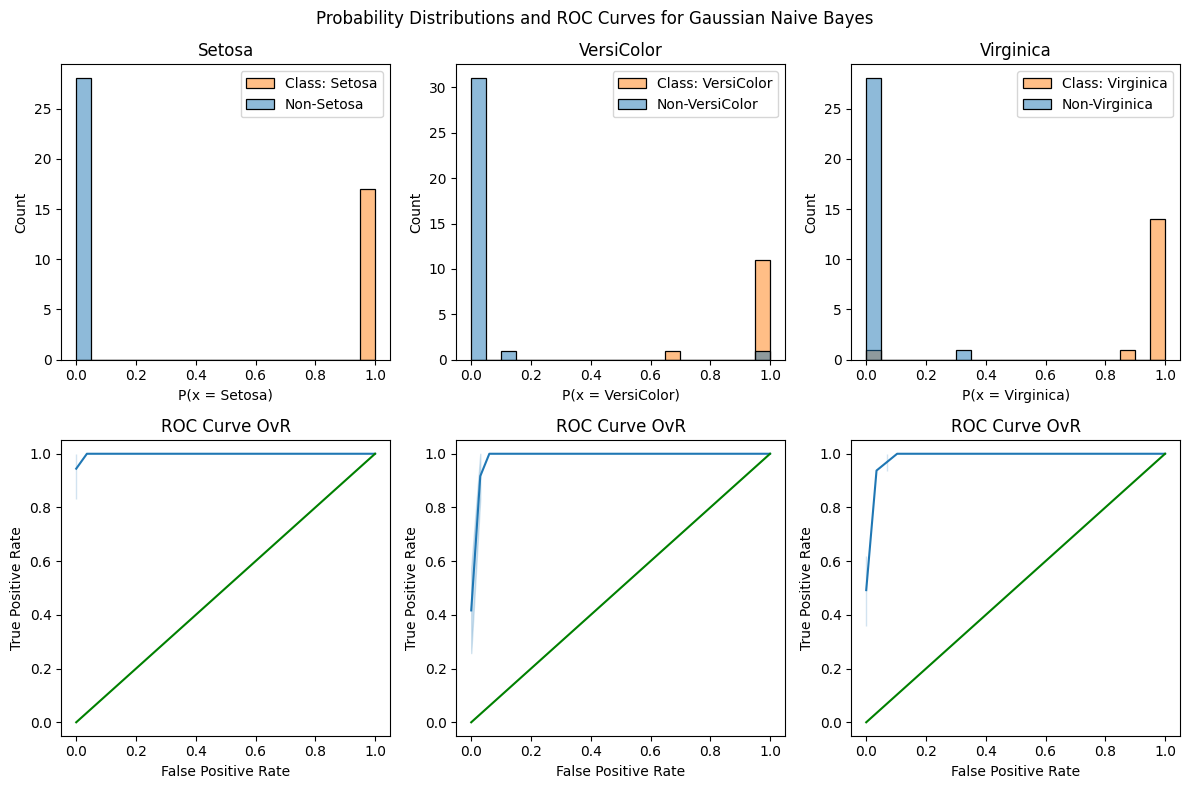

In [562]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_gnb = {}
class_name = ['Setosa','VersiColor', 'Virginica']

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test['class']]
    df_aux['prob'] = gnb_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(class_name[i])
    ax.legend([f"Class: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_gnb[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for Gaussian Naive Bayes')
plt.tight_layout()
plt.show()

Kode di atas berfungsi untuk memvisualisasikan distribusi probabilitas dan kinerja kurva ROC untuk model Gaussian Naive Bayes dalam menangani masalah klasifikasi multiclass

In [563]:
classes = knn.classes_
classes

array([0, 1, 2])

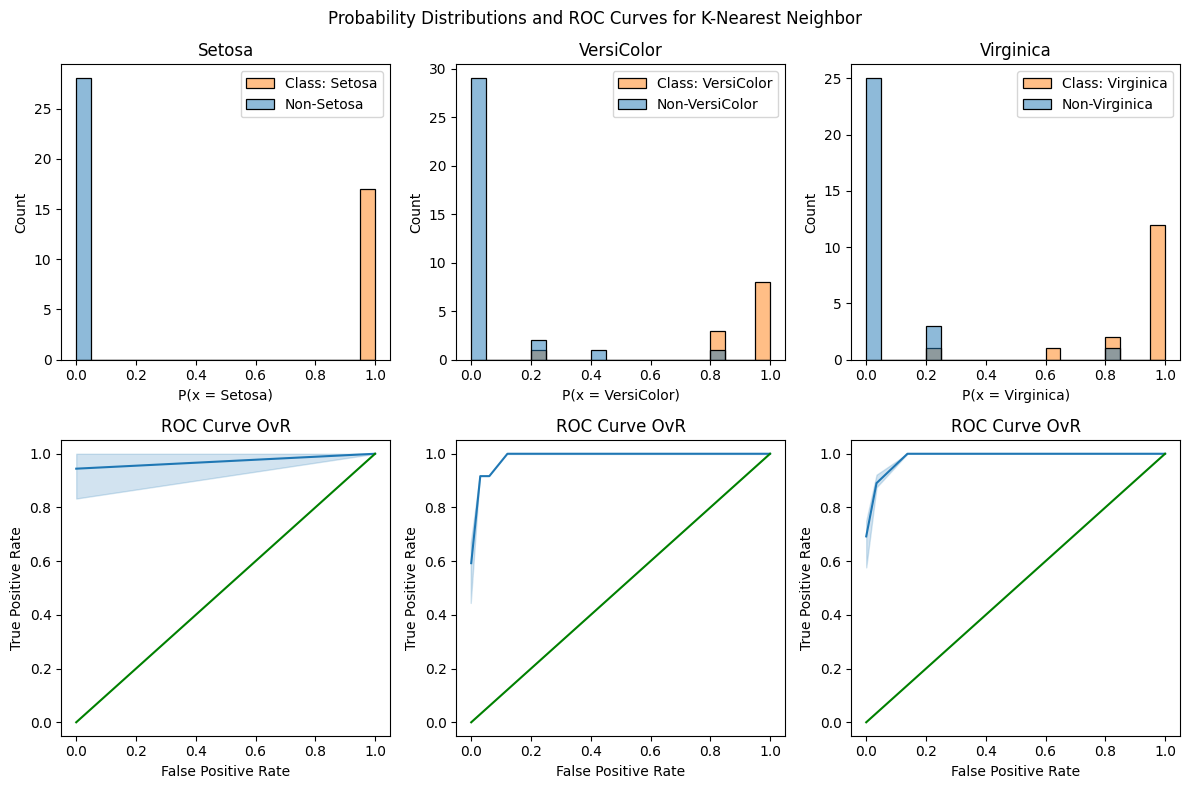

In [564]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_knn = {}
class_name = ['Setosa','VersiColor', 'Virginica']

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test['class']]
    df_aux['prob'] = knn_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(class_name[i])
    ax.legend([f"Class: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_knn[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for K-Nearest Neighbor')
plt.tight_layout()
plt.show()

Kode di atas berfungsi untuk memvisualisasikan distribusi probabilitas dan kinerja kurva ROC untuk model K-Nearest Neighbor dalam menangani masalah klasifikasi multiclass

In [565]:
classes = dtc.classes_
classes

array([0, 1, 2])

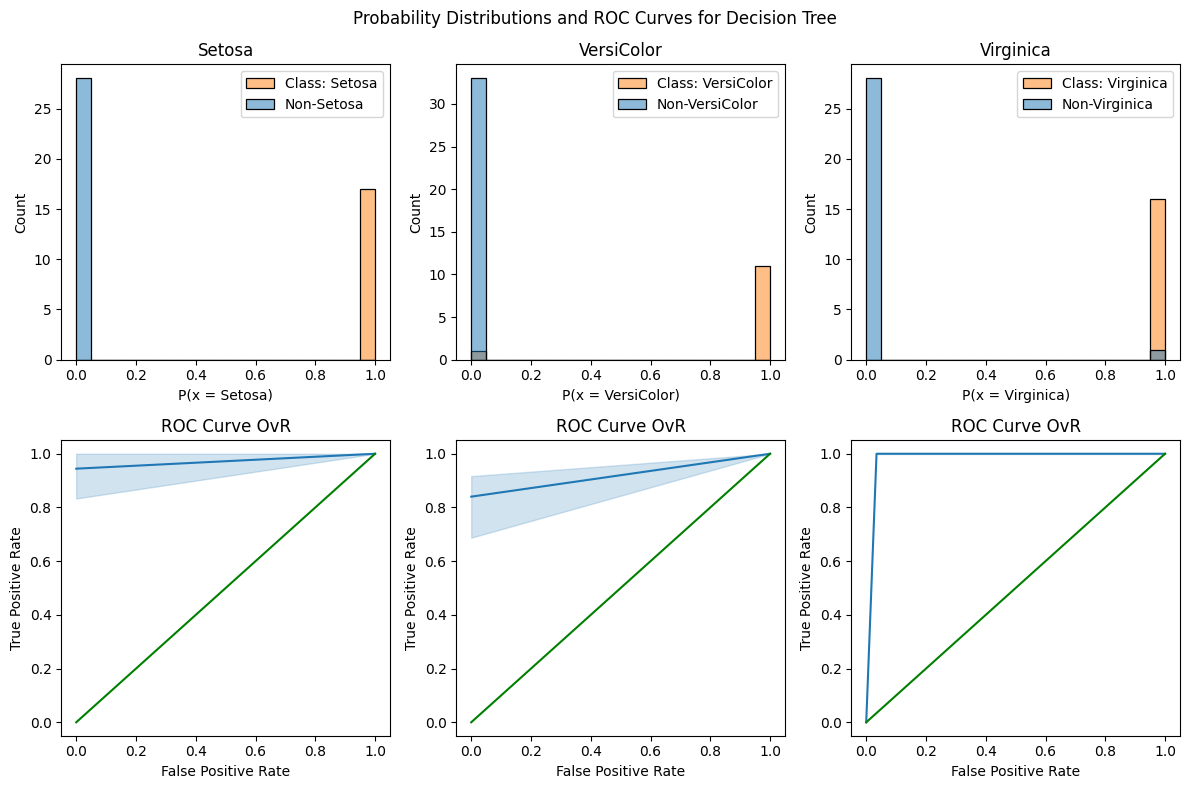

In [566]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr_dtc = {}
class_name = ['Setosa','VersiColor', 'Virginica']

for i in range(len(classes)):
    # Gets the class
    c = classes[i]

    # Prepares an auxiliar dataframe to help with the plots
    df_aux = pd.DataFrame(x_test_norm).copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test['class']]
    df_aux['prob'] = dtc_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)

    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(class_name[i])
    ax.legend([f"Class: {class_name[i]}", f"Non-{class_name[i]}"])
    ax.set_xlabel(f"P(x = {class_name[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")

    # Calculates the ROC AUC OvR
    roc_auc_ovr_dtc[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

plt.suptitle('Probability Distributions and ROC Curves for Decision Tree')
plt.tight_layout()
plt.show()

Kode di atas berfungsi untuk memvisualisasikan distribusi probabilitas dan kinerja kurva ROC untuk model Decision Tree dalam menangani masalah klasifikasi multiclass

1. Kesimpulan dari Histogram:

- Kelas Setosa memiliki distribusi yang lebih terpusat dengan nilai probabilitas yang lebih tinggi.
- Kelas VersiColor memiliki distribusi yang lebih tersebar dengan nilai probabilitas yang lebih rendah.
- Kelas Virginica memiliki distribusi yang terpusat dengan nilai probabilitas di tengah.

2. Kesimpulan dari Kurva ROC:

- Ketiga kurva ROC menunjukkan performa klasifikasi yang baik, dengan AUC (Area Under the Curve) yang tinggi.
- Kurva ROC untuk Setosa vs Non-Setosa memiliki AUC tertinggi, menunjukkan performa klasifikasi terbaik.
- Kurva ROC untuk Virginica vs Non-Virginica memiliki AUC terendah, menunjukkan performa klasifikasi yang sedikit lebih rendah dibandingkan dua kurva lainnya.

tetapi dalam kasus ini kesimpulan dari kurva ROC dan histogram memang tidak sepenuhnya searah.

In [567]:
# Accuracy
accuracy_gnb = accuracy_score(y_test, gnb_pred)
accuracy_knn = accuracy_score(y_test, knn_pred)
accuracy_dtc = accuracy_score(y_test, dtc_pred)

# Precision
precision_gnb = precision_score(y_test, gnb_pred, average='macro')
precision_knn = precision_score(y_test, knn_pred, average='macro')
precision_dtc = precision_score(y_test, dtc_pred, average='macro')

# Recall
recall_gnb = recall_score(y_test, gnb_pred, average='macro')
recall_knn = recall_score(y_test, knn_pred, average='macro')
recall_dtc = recall_score(y_test, dtc_pred, average='macro')

# F1 Score
f1_gnb = f1_score(y_test, gnb_pred, average='macro')
f1_knn = f1_score(y_test, knn_pred, average='macro')
f1_dtc = f1_score(y_test, dtc_pred, average='macro')

print("Nilai Akurasi GNB:", accuracy_gnb)
print("Nilai Presisi GNB:", precision_gnb)
print("Nilai Recall GNB:", recall_gnb)
print("Nilai F1 GNB:", f1_gnb)
print("ROC Setosa vs Non-Setosa:", roc_auc_ovr_gnb[0])
print("ROC VersiColor vs Non-VersiColor:", roc_auc_ovr_gnb[1])
print("ROC Virginica vs Non-Virginica:", roc_auc_ovr_gnb[2])

print('\n')
print("Nilai Akurasi KNN:", accuracy_knn)
print("Nilai Presisi KNN:", precision_knn)
print("Nilai Recall KNN:", recall_knn)
print("Nilai F1 KNN:", f1_knn)
print("ROC Setosa vs Non-Setosa:", roc_auc_ovr_knn[0])
print("ROC VersiColor vs Non-VersiColor:", roc_auc_ovr_knn[1])
print("ROC Virginica vs Non-Virginica:", roc_auc_ovr_knn[2])

print('\n')
print("Nilai Akurasi DTC:", accuracy_dtc)
print("Nilai Presisi DTC:", precision_dtc)
print("Nilai Recall DTC:", recall_dtc)
print("Nilai F1 DTC:", f1_dtc)
print("ROC Setosa vs Non-Setosa:", roc_auc_ovr_dtc[0])
print("ROC VersiColor vs Non-VersiColor:", roc_auc_ovr_dtc[1])
print("ROC Virginica vs Non-Virginica:", roc_auc_ovr_dtc[2])

Nilai Akurasi GNB: 0.9777777777777777
Nilai Presisi GNB: 0.9743589743589745
Nilai Recall GNB: 0.9791666666666666
Nilai F1 GNB: 0.9759139784946237
ROC Setosa vs Non-Setosa: 1.0
ROC VersiColor vs Non-VersiColor: 0.994949494949495
ROC Virginica vs Non-Virginica: 0.9956896551724138


Nilai Akurasi KNN: 0.9555555555555556
Nilai Presisi KNN: 0.9513888888888888
Nilai Recall KNN: 0.9513888888888888
Nilai F1 KNN: 0.9513888888888888
ROC Setosa vs Non-Setosa: 1.0
ROC VersiColor vs Non-VersiColor: 0.9886363636363636
ROC Virginica vs Non-Virginica: 0.990301724137931


Nilai Akurasi DTC: 0.9777777777777777
Nilai Presisi DTC: 0.9803921568627452
Nilai Recall DTC: 0.9722222222222222
Nilai F1 DTC: 0.9754062362758015
ROC Setosa vs Non-Setosa: 1.0
ROC VersiColor vs Non-VersiColor: 0.9583333333333333
ROC Virginica vs Non-Virginica: 0.9827586206896552


berikut adalah nilai- nilai dari setiap metode yang digunakan dalam modelling predicted

Dari kesimpulan di atas, kita dapat mengatakan bahwa model Gaussian Naive Bayes dan Decision Tree Classifier menunjukkan kinerja yang lebih baik secara keseluruhan dibandingkan dengan K-Nearest Neighbors dalam dataset ini. Dikarenakan nilai-nilai dari metode Gausian Naive Bayes dan Decision Tree mendekati nilai 1

### Klustering

In [568]:
silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Hierical Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.501570,285.991968,0.744826
Hierical Clustering Score,0.489289,254.943583,0.724980


**Kesimpulan**:

1. KMeans:
- Memiliki skor Silhouette yang lebih tinggi (0.501570).
- Memiliki skor Calinski-Harabasz yang lebih tinggi (285.991968).
- Memiliki skor Davies-Bouldin yang lebih rendah (0.744826).
2. Hierarchical Clustering:
- Memiliki skor Silhouette yang lebih rendah (0.489289).
- Memiliki skor Calinski-Harabasz yang lebih rendah (254.943583).
- Memiliki skor Davies-Bouldin yang lebih tinggi (0.724980).

Berdasarkan skor, KMeans tampaknya memiliki performa yang sedikit lebih baik dalam hal pemisahan klaster, sedangkan Hierarchical Clustering memiliki performa yang sedikit lebih baik dalam hal variabilitas antar klaster.

Note:

- Silhouette : Mendekati 1, maka data yang digunakan sangat cocok dengan kluster yang terbagi. Kalau 0, maka data mendekati batas luar kedua kluster. Kalau mendekati -1 berarti data salah ditempatkan pada kluster yang seharusnya (penempatan kluster salah)

- Calinski-Harabasz Score : Semakin tinggi, maka kluster terpisah semakin baik

- Davies-Bouldin : Semakin kecil, maka semakin baik kluster terpisah

## Review Process

### Cross Validation

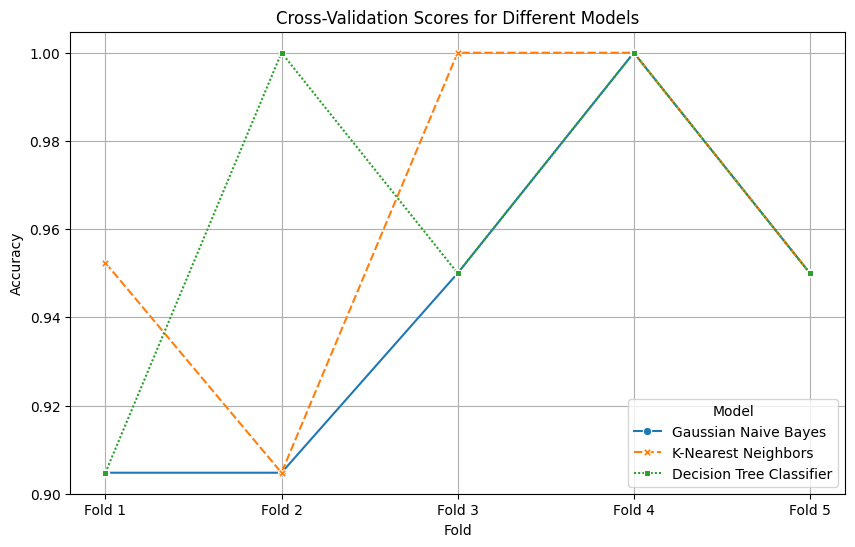

In [569]:
# Inisialisasi model
models = [gnb, knn, dtc]
model_names = ['Gaussian Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree Classifier']

# Lakukan validasi silang untuk setiap model
cv_scores = []
for model in models:
    scores = cross_val_score(model, x_train_norm, y_train, cv=5)
    cv_scores.append(scores)

# Buat dataframe dari hasil validasi silang
df_cv_scores = pd.DataFrame(cv_scores, index=model_names).T

# Tampilkan visualisasi hasil validasi silang dengan lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_cv_scores, markers=True)
plt.title('Cross-Validation Scores for Different Models')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title='Model', loc='lower right')
plt.xticks(ticks=range(5), labels=['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.show()

Dengan melihat plot ini, Kita dapat membandingkan kinerja relatif dari setiap model dan melihat bagaimana setiap model bereaksi terhadap data pada setiap lipatan validasi silang. Hal ini dapat membantu kita dalam memilih model yang paling sesuai untuk dataset kita.

untuk sumbu Y (accuracy) semakin tinggi nilainya artinya semakin baik kinerja model

dan untuk sumbu x dari plot menunjukkan lipatan (fold) dari validasi silang. Dalam skema 5 lipatan, ada 5 fold yang direpresentasikan sebagai "Fold 1", "Fold 2", dan seterusnya hingga "Fold 5".

lalu kita dapat melihat dari setiap kinerja model dengan membandingkat titik- titik pada setiap lipatan (Fold)

### Feature Selection

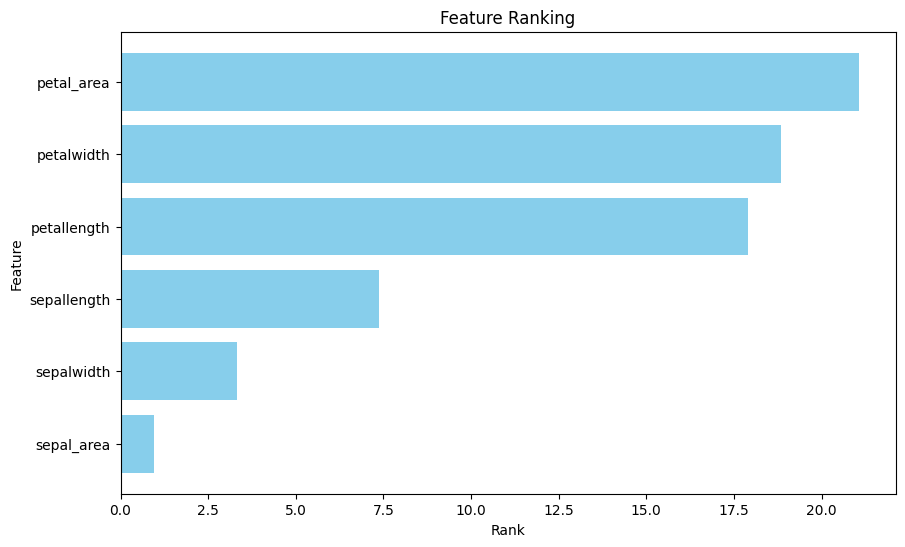

In [570]:
selector = SelectKBest(score_func=chi2, k='all')

selector.fit(x_train_norm, y_train)

feature_ranks = selector.scores_

feature_names = x_train.columns

feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking')
plt.gca().invert_yaxis()
plt.show()

Dengan melihat plot ini, kita dapat mengidentifikasi fitur-fitur yang memiliki pengaruh yang signifikan terhadap target dalam model kita. Hal ini membantu dalam pemilihan fitur yang optimal untuk digunakan dalam pembuatan model.

Feature Selection Menggunakan Algoritma DTC

<ipython-input-571-d97da845ab5b>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




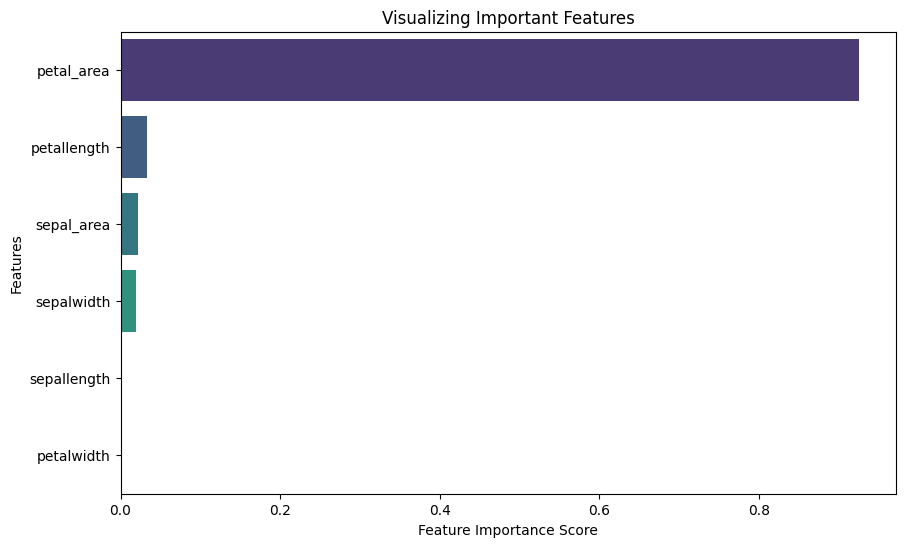

In [571]:
# Mendefinisikan feature importance
feature_imp = pd.Series(dtc.feature_importances_, index=x.columns).sort_values(ascending=False)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


Dengan menggunakan plot tersebut, kita dapat dengan jelas melihat seberapa pentingnya setiap fitur dalam model Decision Tree Classifier kita.

### Tuning Hyperparameter

In [572]:
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

grid_search.fit(x_train_norm, y_train)

print("Parameter terbaik:", grid_search.best_params_)

y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

acc_before_tuning = gnb.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)

Parameter terbaik: {'var_smoothing': 0.43287612810830584}
Akurasi sebelum tuning: 0.9777777777777777
Akurasi setelah tuning: 0.9555555555555556


In [573]:
gnb = GaussianNB(var_smoothing=0.43287612810830584)

Dengan cara ini, kita melakukan penyetelan model Gaussian Naive Bayes untuk mencari nilai terbaik untuk parameter var_smoothing, yang kemudian dapat meningkatkan kinerja model.

In [574]:
# Definisikan grid parameter yang akan ditelusuri
param_grid = {
    'n_neighbors': range(1, 21),  # Coba nilai K dari 1 hingga 20
    'weights': ['uniform', 'distance'],  # Coba kedua jenis bobot
    'p': [1, 2]  # Coba kedua jenis jarak (Manhattan dan Euclidean)
}

# Lakukan pencarian grid dengan cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Lakukan pelatihan pada data latih yang sudah dinormalisasi
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = knn.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Akurasi sebelum tuning: 0.9555555555555556
Akurasi setelah tuning: 0.9555555555555556


In [575]:
knn = KNeighborsClassifier(n_neighbors=9, p=1, weights='uniform')

Dengan cara ini, kita melakukan penyetelan model KNN untuk mencari kombinasi parameter terbaik yang meningkatkan kinerja model.

In [576]:
# Definisikan grid parameter yang akan ditelusuri
param_grid = {
    'criterion': ['gini', 'entropy'],  # Coba kedua jenis kriteria pemilihan fitur
    'max_depth': [None, 10, 20, 30, 40, 50],  # Coba beberapa kedalaman maksimum
    'min_samples_split': [2, 5, 10],  # Coba beberapa nilai minimum sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4]  # Coba beberapa nilai minimum sampel di leaf node
}

# Lakukan pencarian grid dengan cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5)

# Lakukan pelatihan pada data latih yang sudah dinormalisasi
grid_search.fit(x_train_norm, y_train)

# Cetak parameter terbaik yang ditemukan
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi menggunakan model terbaik
y_pred_tuned = grid_search.best_estimator_.predict(x_test_norm)

# Hitung akurasi sebelum penyetelan (tuning)
acc_before_tuning = dtc.score(x_test_norm, y_test)
print("Akurasi sebelum tuning:", acc_before_tuning)

# Hitung akurasi setelah penyetelan (tuning)
acc_after_tuning = grid_search.best_estimator_.score(x_test_norm, y_test)
print("Akurasi setelah tuning:", acc_after_tuning)


Parameter terbaik: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Akurasi sebelum tuning: 0.9777777777777777
Akurasi setelah tuning: 0.9555555555555556


In [577]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_leaf=1, min_samples_split= 2)

Dengan cara ini, Anda melakukan penyetelan model DTC untuk mencari kombinasi parameter terbaik yang meningkatkan kinerja model.

Kesimpulannya, dalam seluruh kode yang telah kita tampilkan, kita melakukan proses penyetelan model (model tuning) untuk tiga jenis model klasifikasi yang berbeda: Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree Classifier (DTC). Proses penyetelan ini bertujuan untuk mencari kombinasi parameter terbaik yang dapat meningkatkan kinerja model pada data uji.